In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
#Reading data from csv using Pandas and storing it as Dataframe

In [2]:
df=pd.read_csv("C:/Users/Dharmarajan/Documents/Guvi/Project/Project 4/Copper_Set_Result.csv")

C:\Users\Dharmarajan\AppData\Local\Temp\ipykernel_9436\2744305360.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("C:/Users/Dharmarajan/Documents/Guvi/Project/Project 4/Copper_Set_Result.csv")


In [ ]:
#Drop Columns 'id' and 'material_ref' as those are not relevant for Data Analysis

In [3]:
df.drop(['id','material_ref'],axis=1,inplace=True)

In [ ]:
#Convert columns to Numeric/ Date format

In [4]:
df['quantity tons']=pd.to_numeric(df['quantity tons'],errors='coerce')
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce')

In [ ]:
#If Data is <0, change the data as NaN

In [5]:
df['quantity tons']=df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price']=df['selling_price'].apply(lambda x: np.nan if x<=0 else x)

In [ ]:
#Validating Null value Columns

In [6]:
df.isna().sum()

item_date         3
quantity tons     5
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     3
selling_price     8
dtype: int64

In [ ]:
#Using Median for handling Null Values for numerical data

In [7]:
df['quantity tons']=df['quantity tons'].fillna(df['quantity tons'].median())
df['country']=df['country'].fillna(df['country'].median())
df['application']=df['application'].fillna(df['application'].median())
df['thickness']=df['thickness'].fillna(df['thickness'].median())
df['selling_price']=df['selling_price'].fillna(df['selling_price'].median())

In [ ]:
#Using Ffill for handling Null Values for text/date fields

In [8]:
df['customer']=df['customer'].ffill()
df['item_date']=df['item_date'].ffill()
df['delivery date']=df['delivery date'].ffill()

In [ ]:
#Using Mode for handling null values in Non numerical column 

In [9]:
df['status']=df['status'].fillna(df['status'].mode().values[0])

In [10]:
df.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [ ]:
#Using Ordinal Encoder for converting Categorical data to Numerical value

In [11]:
df['status'].unique()
#array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM','Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [12]:
df['item type'].unique()
#array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [13]:
df['status']=OrdinalEncoder().fit_transform(df[['status']])
df['item type']=OrdinalEncoder().fit_transform(df[['item type']])

In [14]:
df['status'].unique()
#array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM','Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)
#array([7., 0., 6., 1., 2., 8., 5., 4., 3.])
#Won-7, Draft-0, To be approved-6,Lost-1,Not lost for AM-2,Wonderful-8,Revised-5,Offered-4,Offerable-3

array([7., 0., 6., 1., 2., 8., 5., 4., 3.])

In [15]:
df['item type'].unique()
#array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)
#array([5., 6., 3., 1., 2., 0., 4.])
#'W'-5, 'WI'-6, 'S'-3, 'Others'-1, 'PL'-2, 'IPL'-0, 'SLAWR'-4

array([5., 6., 3., 1., 2., 0., 4.])

In [ ]:
#Checking Skewness and Outliers

In [17]:
def plot_data(df,col):
    plt.figure(figsize=(25,5))
    plt.subplot(1,3,1)
    sns.boxplot(df[col])
    plt.title("Boxplot of "+str(col))
    plt.subplot(1,3,2)
    sns.histplot(data=df,x=col,kde=True,bins=50)
    plt.title("Distribution of "+str(col))
    plt.subplot(1,3,3)
    sns.violinplot(df[col])
    plt.title("ViolinPlot of "+str(col))
    plt.show()

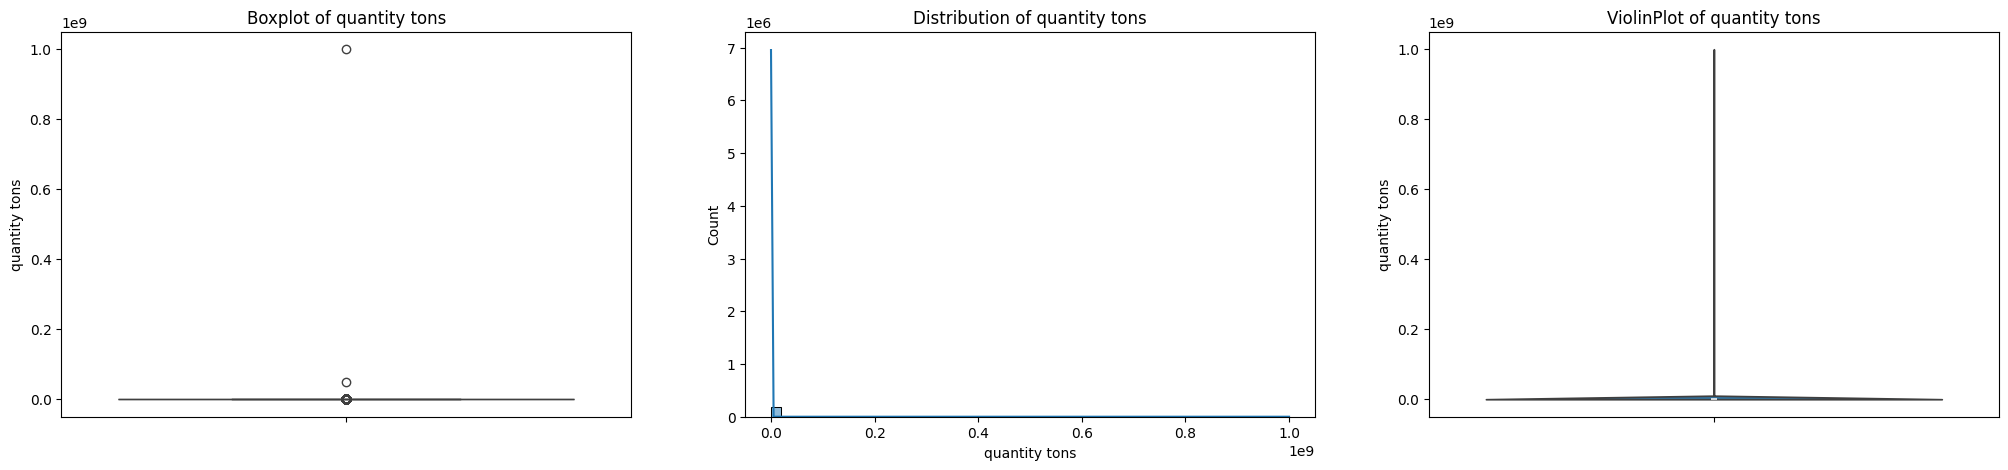

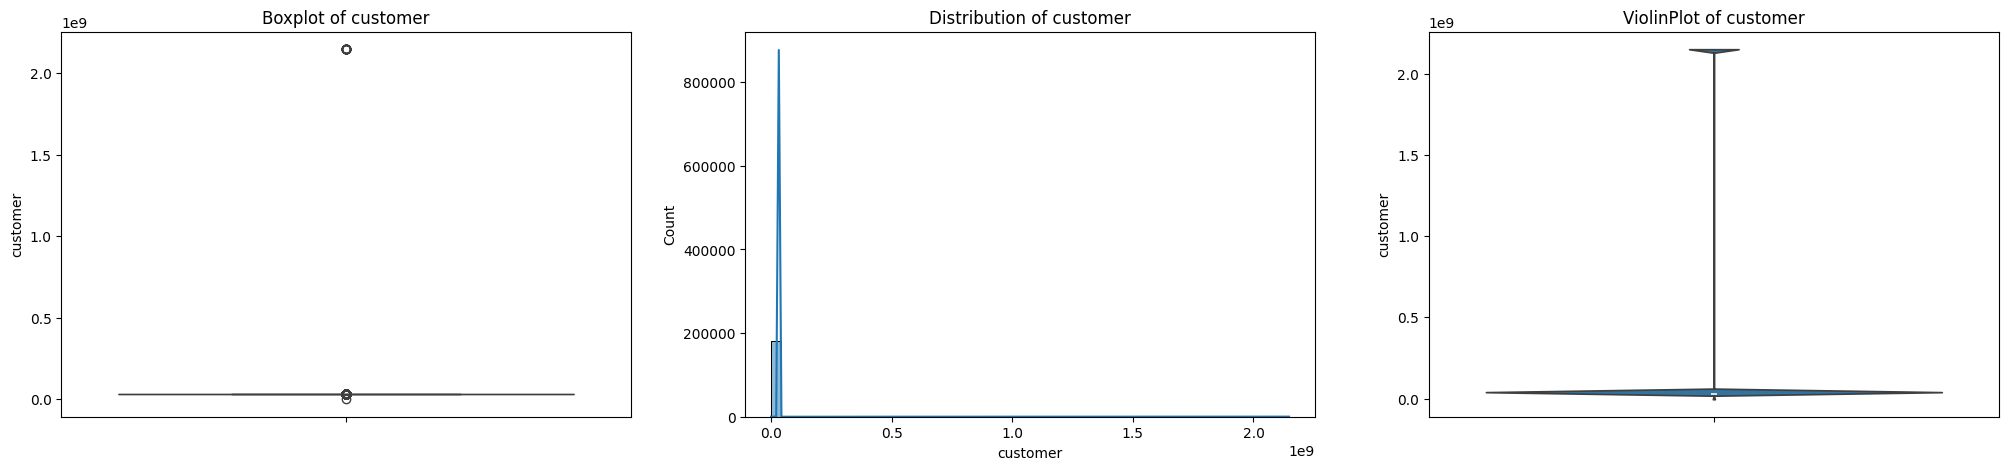

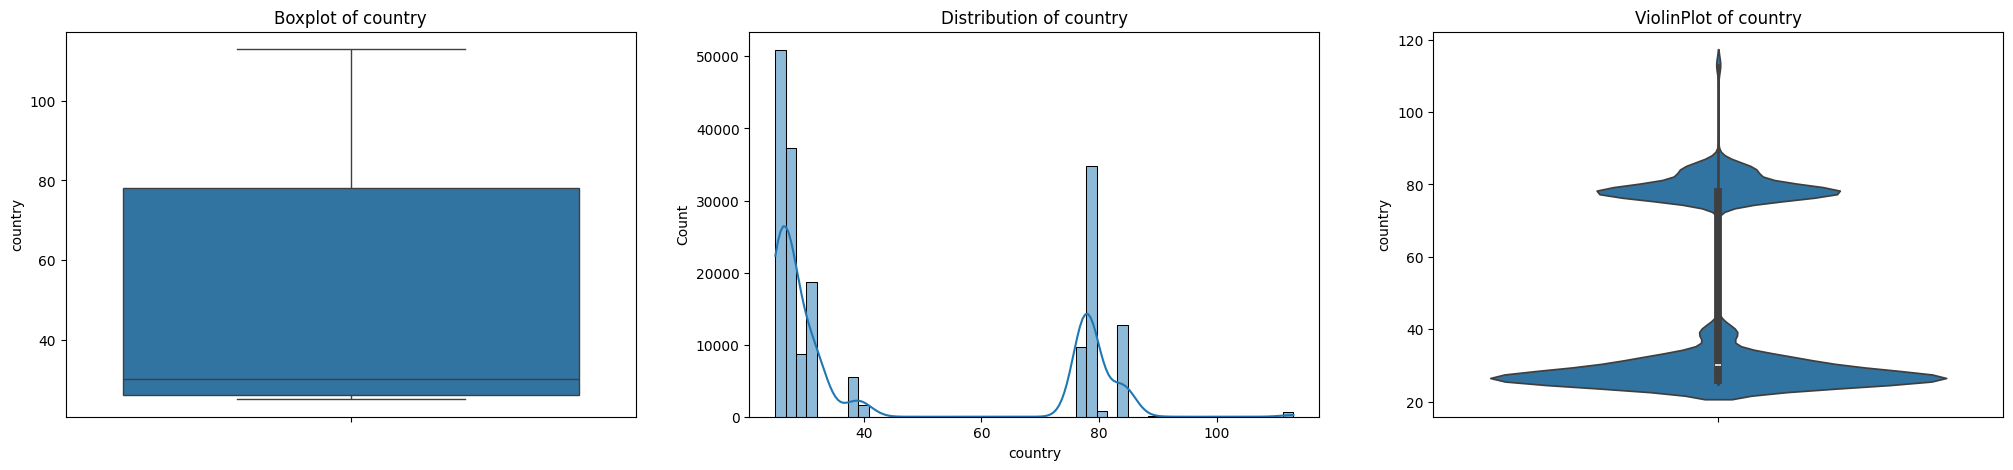

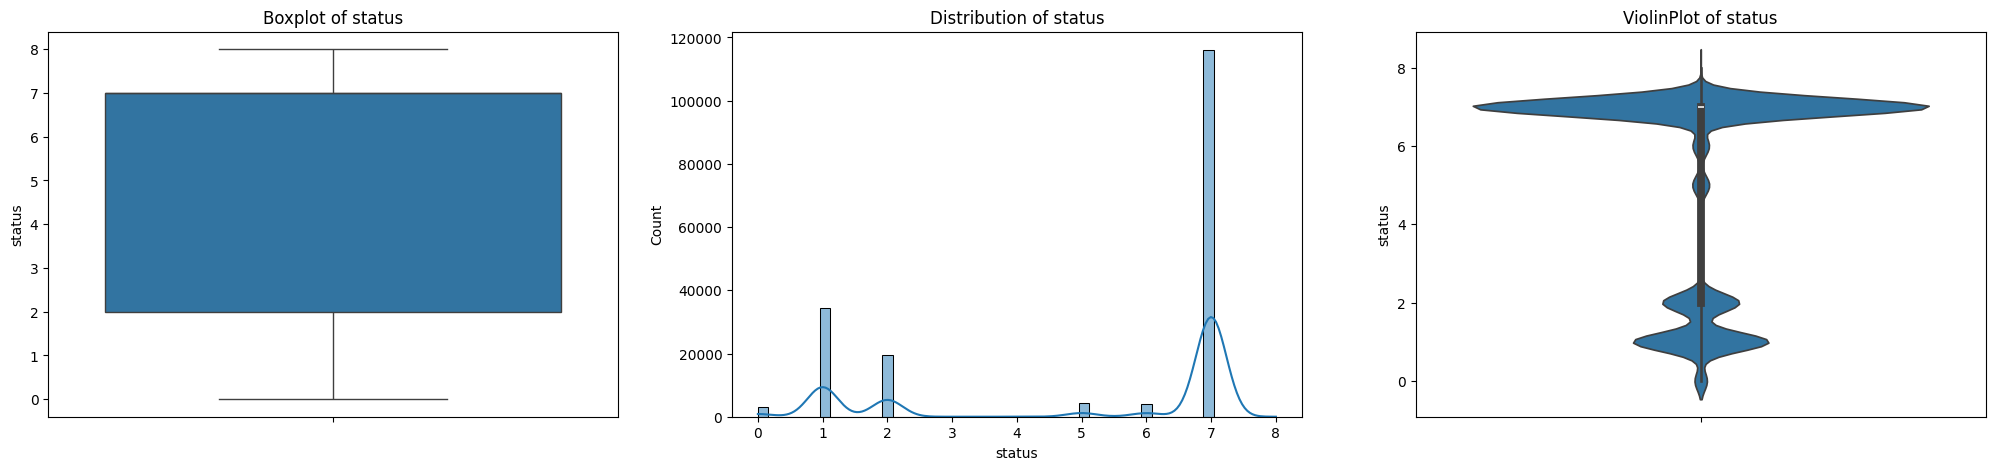

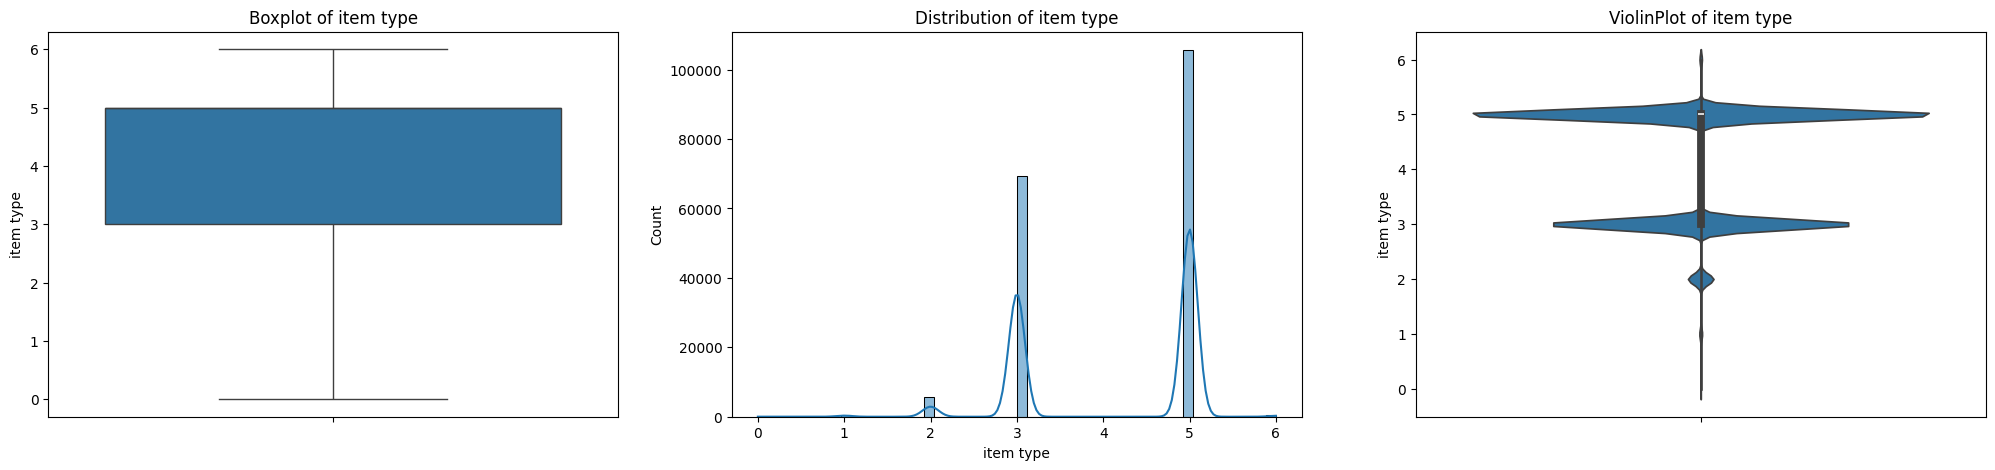

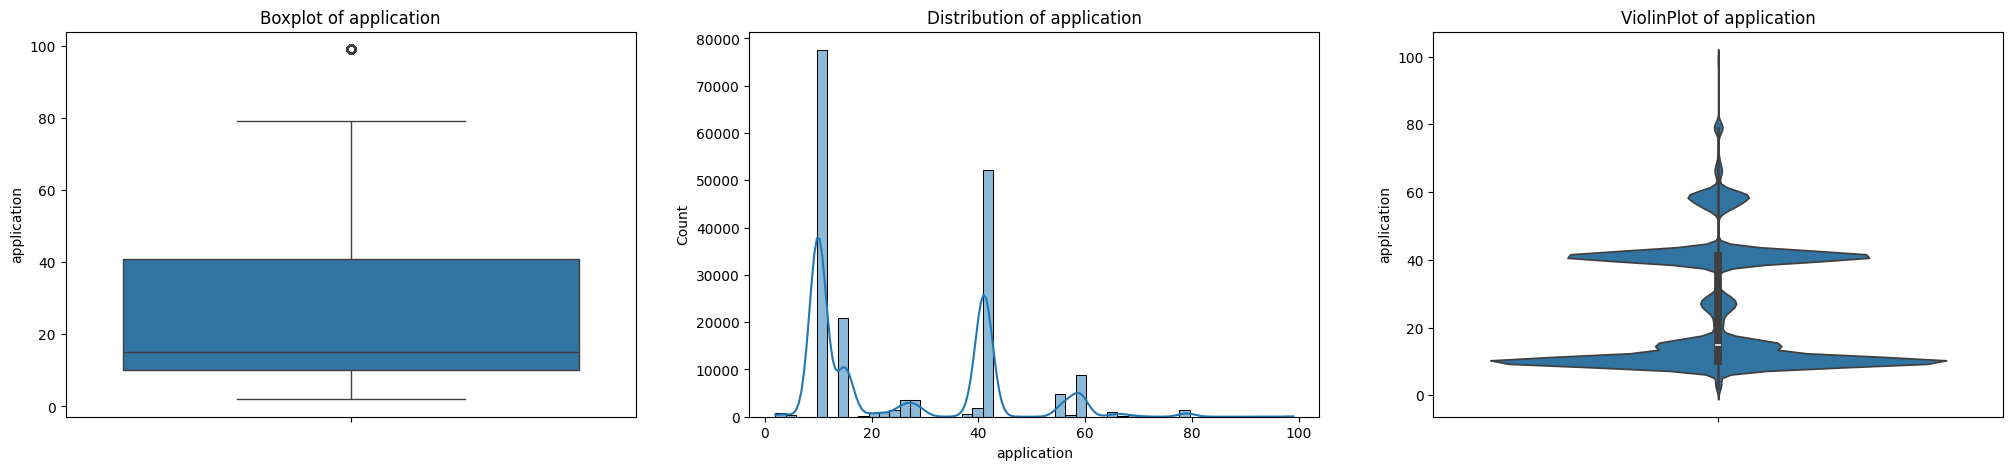

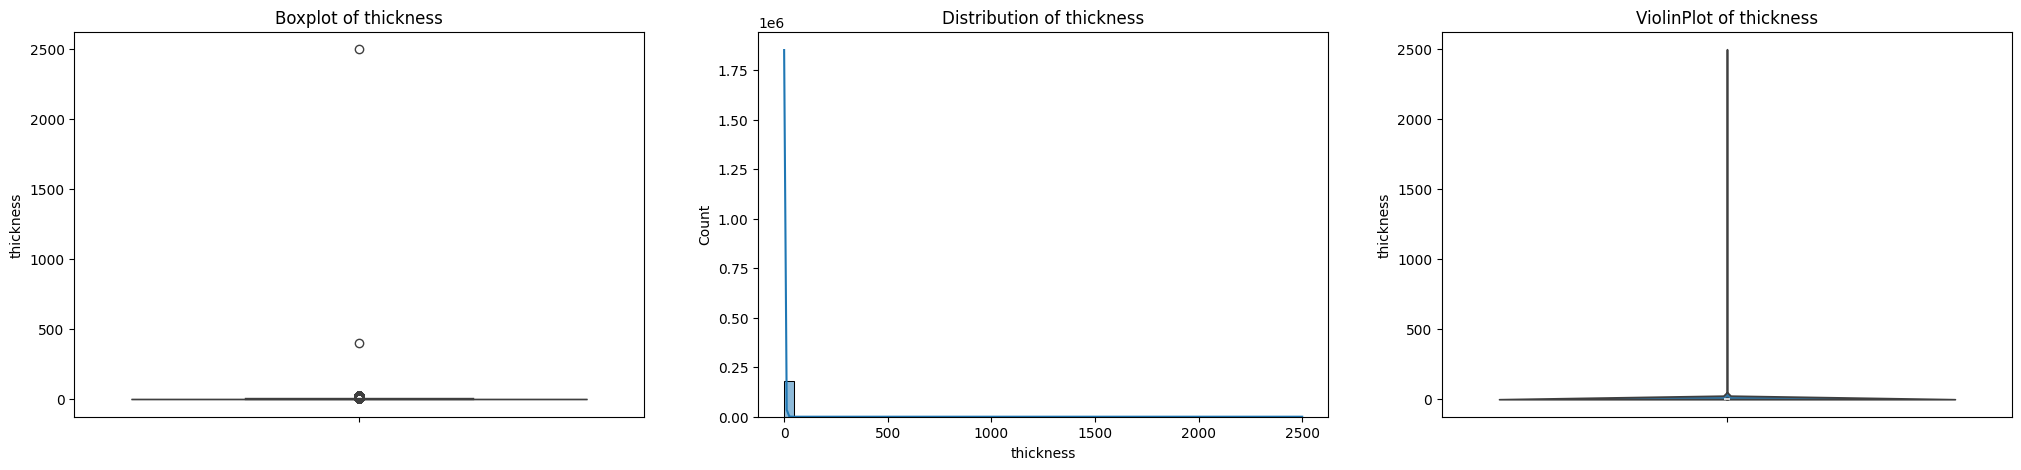

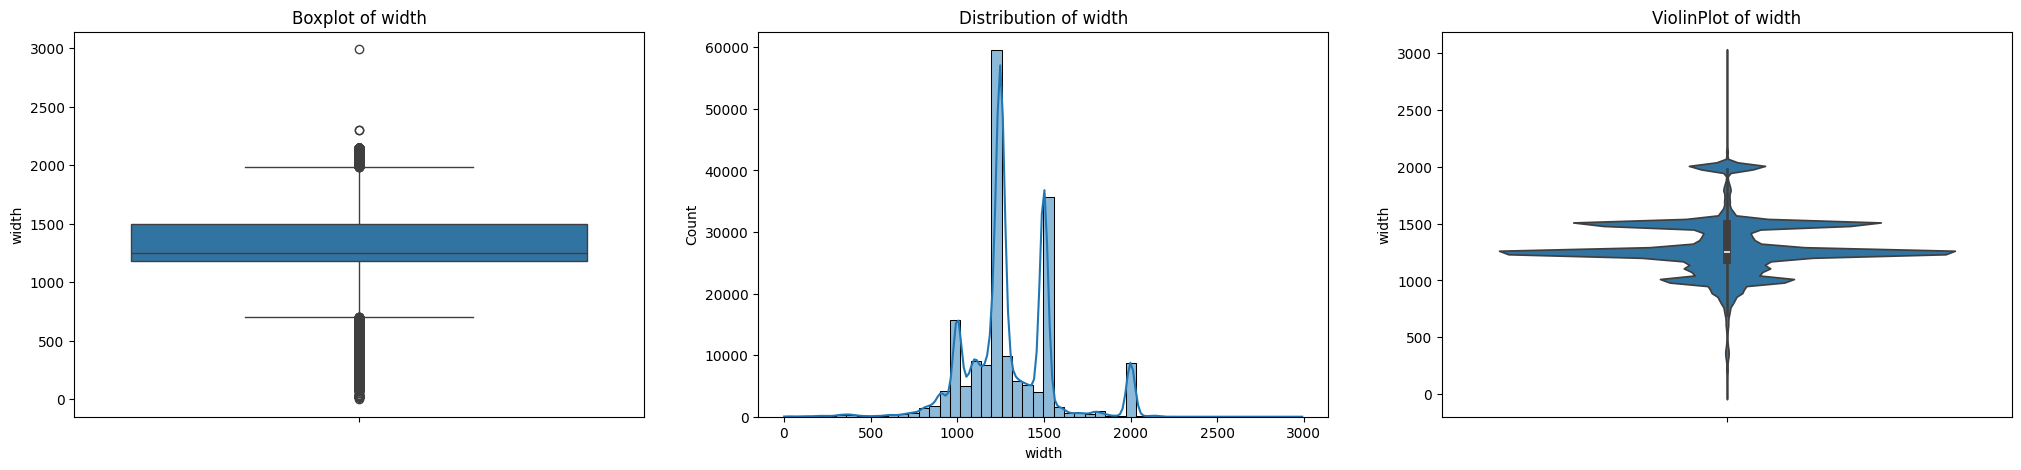

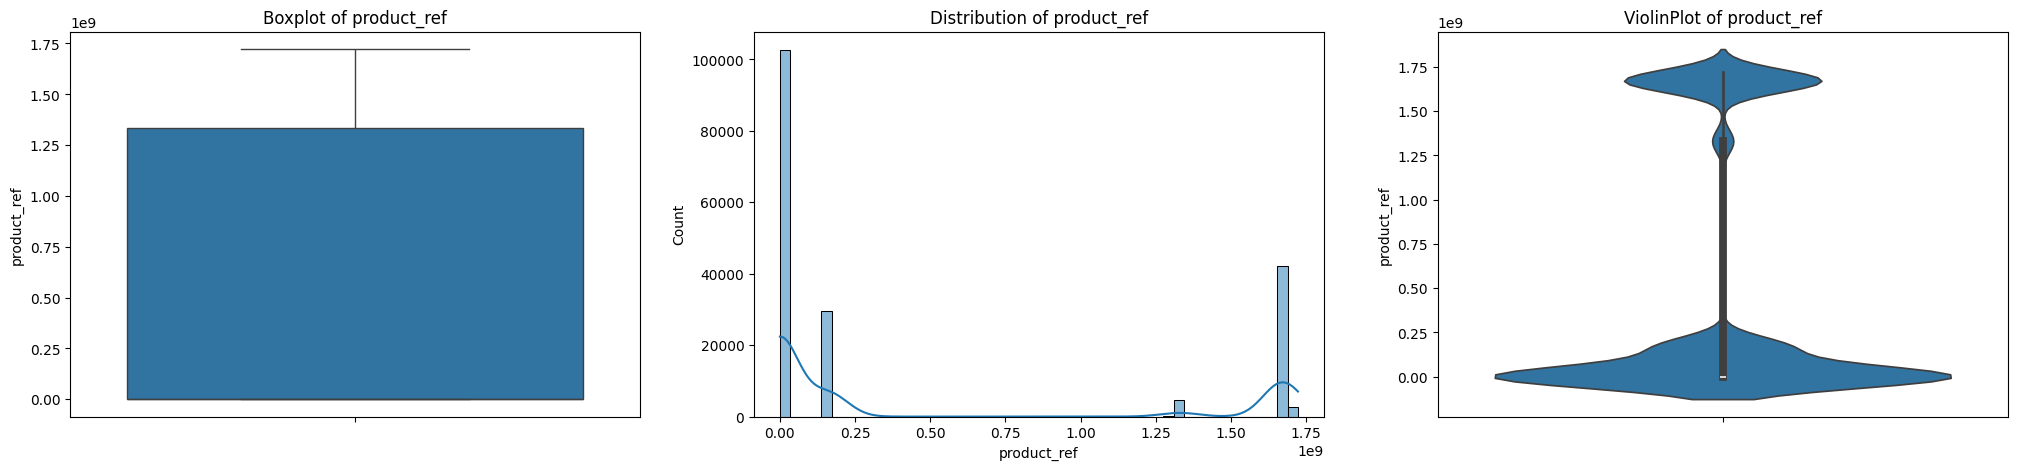

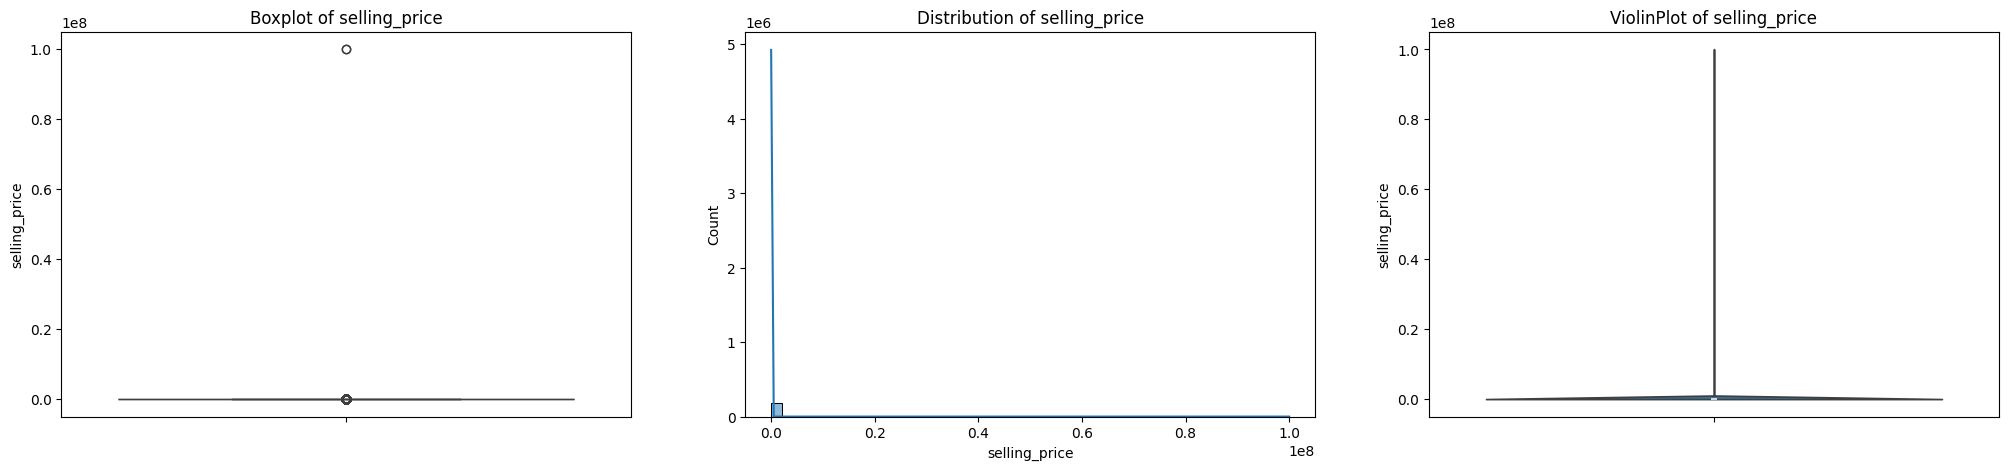

In [18]:
cols=['quantity tons', 'customer', 'country', 'status','item type', 'application', 'thickness', 'width', 'product_ref', 'selling_price']
for col in cols:
    plot_data(df,col)

In [16]:
#Log Transformation for handling Skewed columns
df['quantity tons']=np.log(df['quantity tons'])
df['thickness']=np.log(df['thickness'])
df['selling_price']=np.log(df['selling_price'])

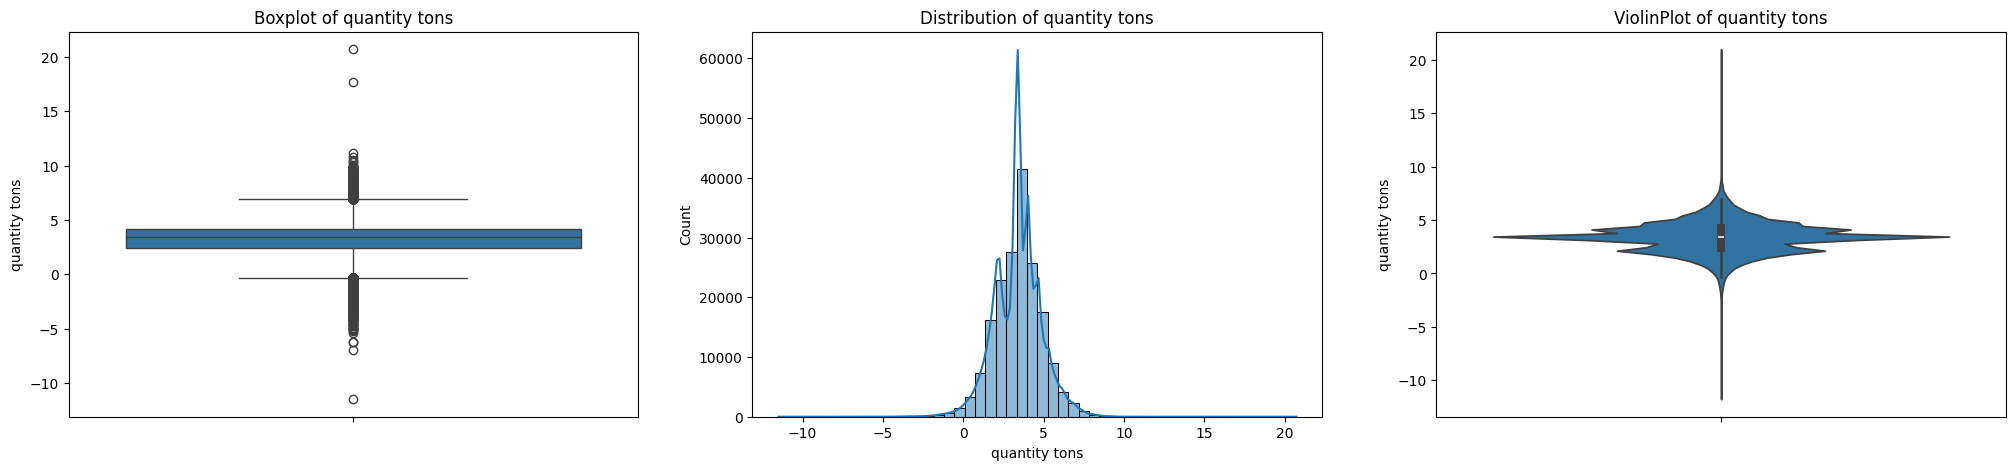

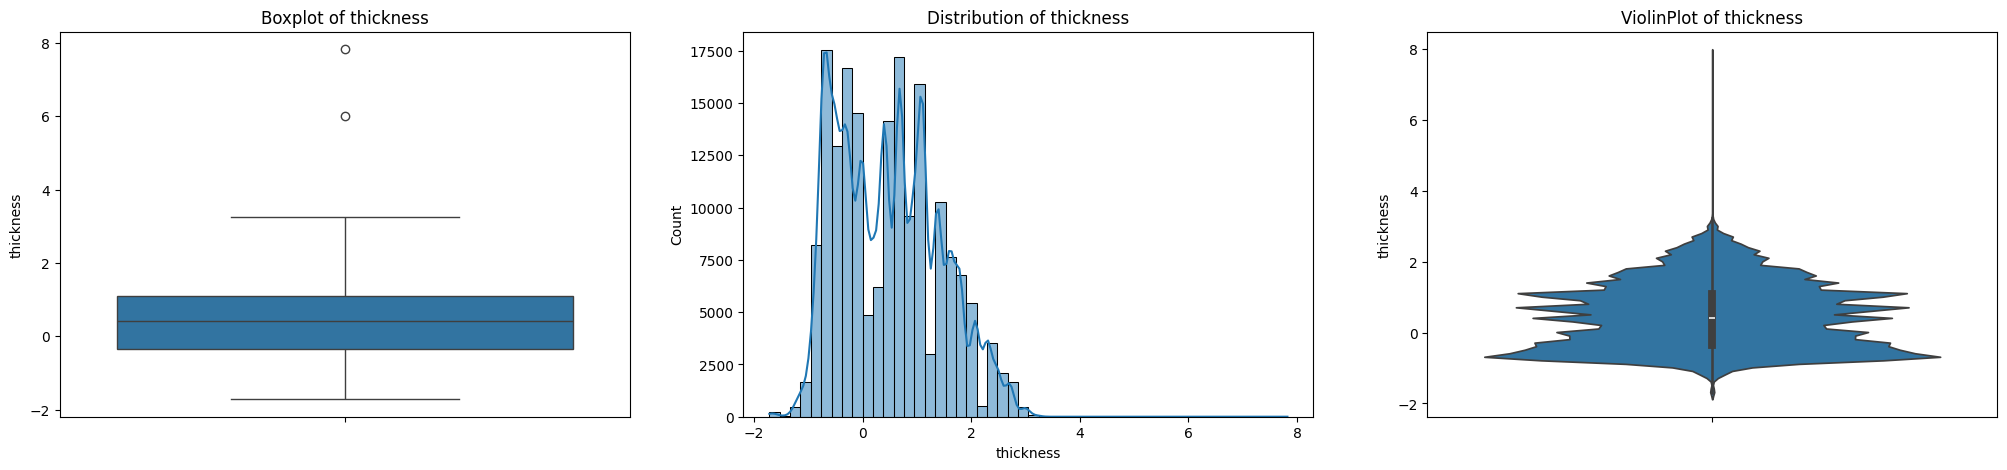

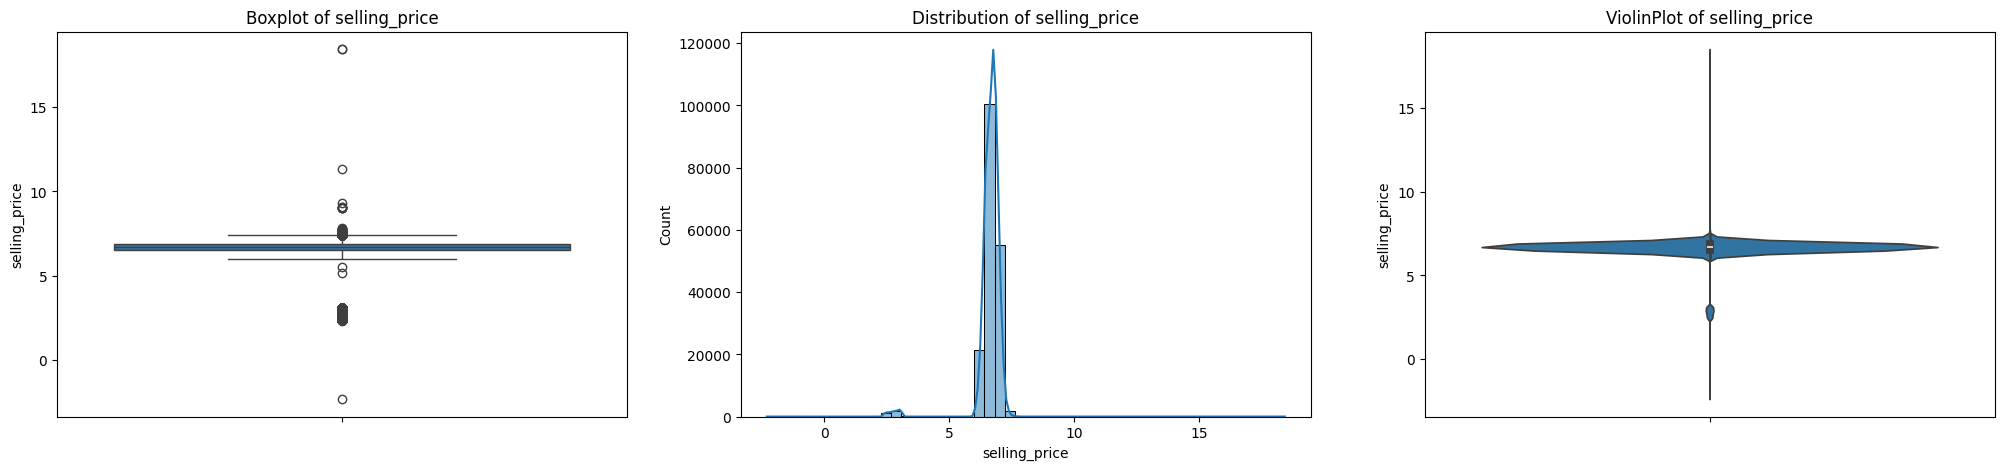

In [20]:
cols=['quantity tons','thickness','selling_price']
for col in cols:
    plot_data(df,col)

In [17]:
#Handling Outliers
def outliers(df,col):
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    upper_threshold = df[col].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[col].quantile(0.25) - (1.5*iqr)
    df[col]=df[col].clip(lower_threshold,upper_threshold)

In [18]:
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,3.991779,30156308.0,28.0,7.0,5.0,10.0,0.693147,1500.0,1670798778,2021-07-01,6.749931
1,2021-04-01,6.643822,30202938.0,25.0,7.0,5.0,41.0,-0.223144,1210.0,1668701718,2021-04-01,6.953684
2,2021-04-01,5.956169,30153963.0,30.0,7.0,6.0,28.0,-0.967584,952.0,628377,2021-01-01,6.468211
3,2021-04-01,5.310301,30349574.0,32.0,7.0,3.0,59.0,0.832909,1317.0,1668701718,2021-01-01,6.643790
4,2021-04-01,6.666354,30211560.0,28.0,7.0,5.0,10.0,1.386294,2000.0,640665,2021-03-01,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,4.629691,30200854.0,25.0,7.0,5.0,41.0,-0.040822,1220.0,164141591,2020-07-01,6.381816
181669,2020-07-02,5.337954,30200854.0,25.0,7.0,5.0,41.0,-0.051293,1500.0,164141591,2020-07-01,6.378426
181670,2020-07-02,1.443523,30200854.0,25.0,7.0,5.0,41.0,-0.342490,1250.0,164141591,2020-07-01,6.428105
181671,2020-07-02,3.413291,30200854.0,25.0,7.0,5.0,41.0,-0.162519,1250.0,164141591,2020-07-01,6.398595


In [19]:
cols=['width','quantity tons','thickness','selling_price']
for col in cols:
    outliers(df,col)

In [20]:
df.describe()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
count,181673,181673.000000,1.816730e+05,181673.000000,181673.000000,181673.000000,181673.000000,181673.000000,181673.000000,1.816730e+05,181673,181673.000000
mean,2020-11-26 22:57:42.894321408,3.392950,3.051221e+07,44.890727,5.131847,4.133036,25.614406,0.480332,1297.045583,4.739679e+08,2021-01-25 22:45:30.501505280,6.680786
min,2020-07-02 00:00:00,-0.322334,1.245800e+04,25.000000,0.000000,0.000000,2.000000,-1.714798,700.000000,6.117280e+05,2019-04-01 00:00:00,5.975038
25%,2020-09-29 00:00:00,2.395316,3.019688e+07,26.000000,2.000000,3.000000,10.000000,-0.356675,1180.000000,6.119930e+05,2020-11-01 00:00:00,6.505784
50%,2020-11-30 00:00:00,3.413291,3.020524e+07,30.000000,7.000000,5.000000,15.000000,0.405465,1250.000000,6.406650e+05,2021-01-01 00:00:00,6.699500
75%,2021-02-03 00:00:00,4.207084,3.028042e+07,78.000000,7.000000,5.000000,41.000000,1.098612,1500.000000,1.332077e+09,2021-04-01 00:00:00,6.859615
max,2021-04-01 00:00:00,6.924734,2.147484e+09,113.000000,8.000000,6.000000,99.000000,3.281543,1980.000000,1.722208e+09,2022-01-01 00:00:00,7.390361
std,NaN,1.394622,2.433375e+07,24.403034,2.644839,1.055230,17.753421,0.933568,248.961933,7.175101e+08,NaN,0.255379


In [21]:
df['quantity tons']=df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['thickness']=df['thickness'].apply(lambda x: np.nan if x<=0 else x)
df.describe()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
count,181673,179223.000000,1.816730e+05,181673.000000,181673.000000,181673.000000,181673.000000,109403.000000,181673.000000,1.816730e+05,181673,181673.000000
mean,2020-11-26 22:57:42.894321408,3.443000,3.051221e+07,44.890727,5.131847,4.133036,25.614406,1.100577,1297.045583,4.739679e+08,2021-01-25 22:45:30.501505280,6.680786
min,2020-07-02 00:00:00,0.000003,1.245800e+04,25.000000,0.000000,0.000000,2.000000,0.009950,700.000000,6.117280e+05,2019-04-01 00:00:00,5.975038
25%,2020-09-29 00:00:00,2.466999,3.019688e+07,26.000000,2.000000,3.000000,10.000000,0.631272,1180.000000,6.119930e+05,2020-11-01 00:00:00,6.505784
50%,2020-11-30 00:00:00,3.424454,3.020524e+07,30.000000,7.000000,5.000000,15.000000,1.098612,1250.000000,6.406650e+05,2021-01-01 00:00:00,6.699500
75%,2021-02-03 00:00:00,4.226346,3.028042e+07,78.000000,7.000000,5.000000,41.000000,1.609438,1500.000000,1.332077e+09,2021-04-01 00:00:00,6.859615
max,2021-04-01 00:00:00,6.924734,2.147484e+09,113.000000,8.000000,6.000000,99.000000,3.281543,1980.000000,1.722208e+09,2022-01-01 00:00:00,7.390361
std,NaN,1.336293,2.433375e+07,24.403034,2.644839,1.055230,17.753421,0.649178,248.961933,7.175101e+08,NaN,0.255379


In [22]:
df['quantity tons']=df['quantity tons'].fillna(df['quantity tons'].median())
df['thickness']=df['thickness'].fillna(df['thickness'].median())

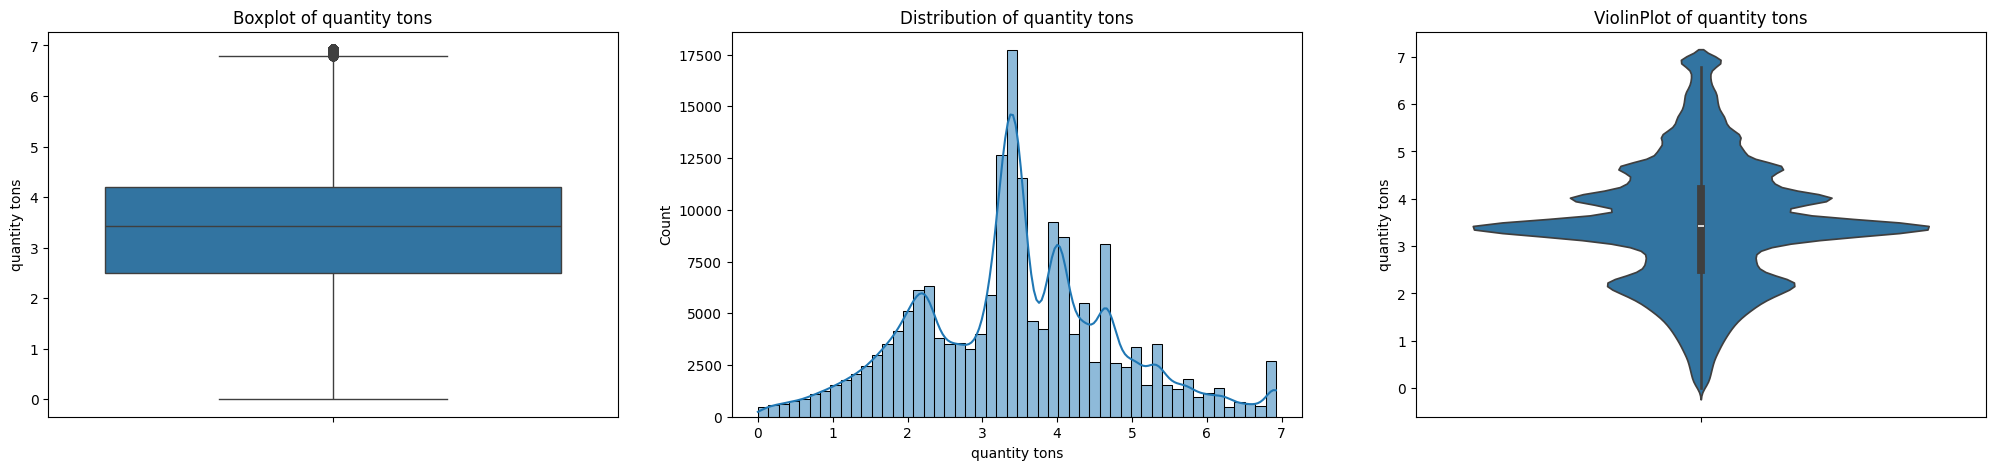

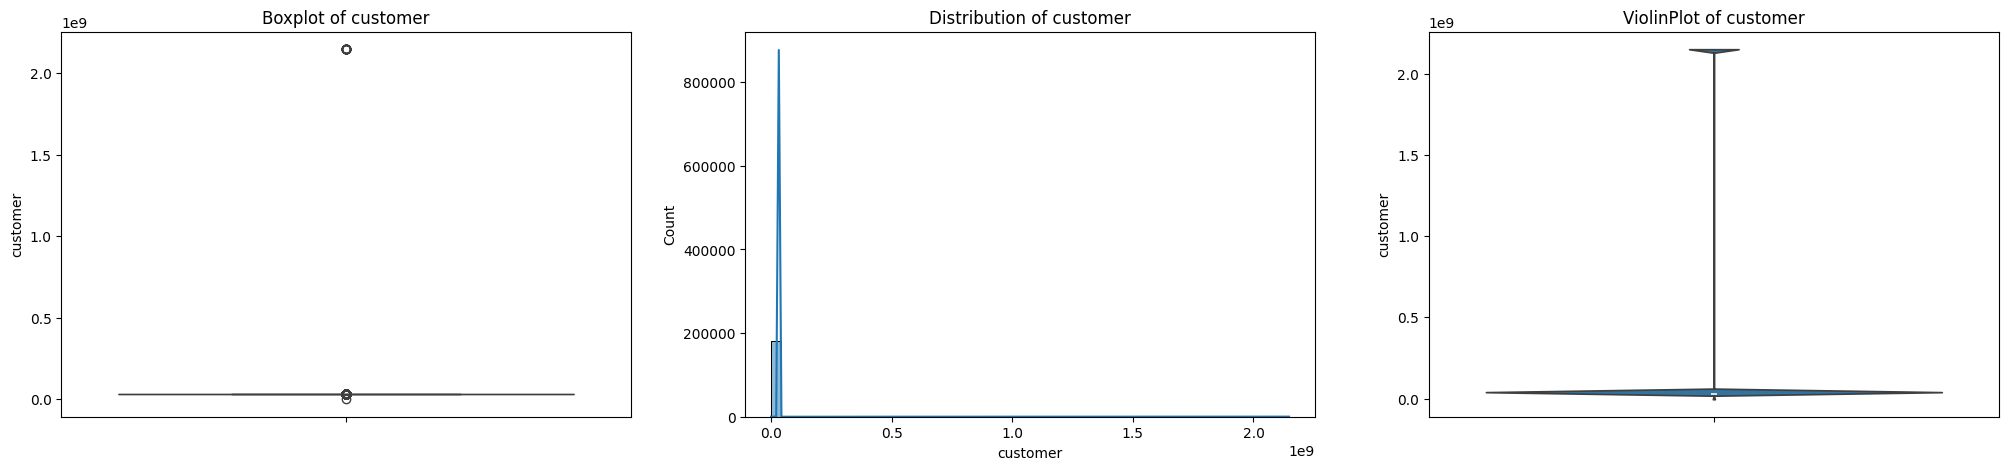

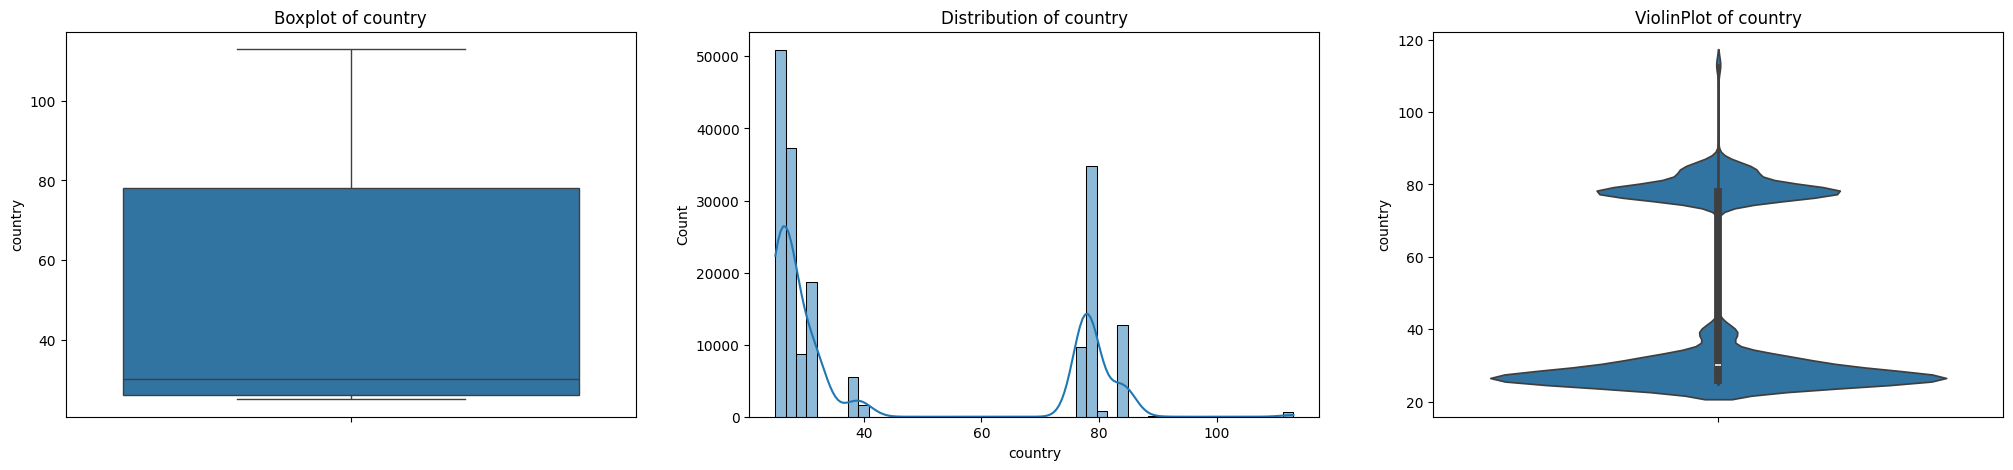

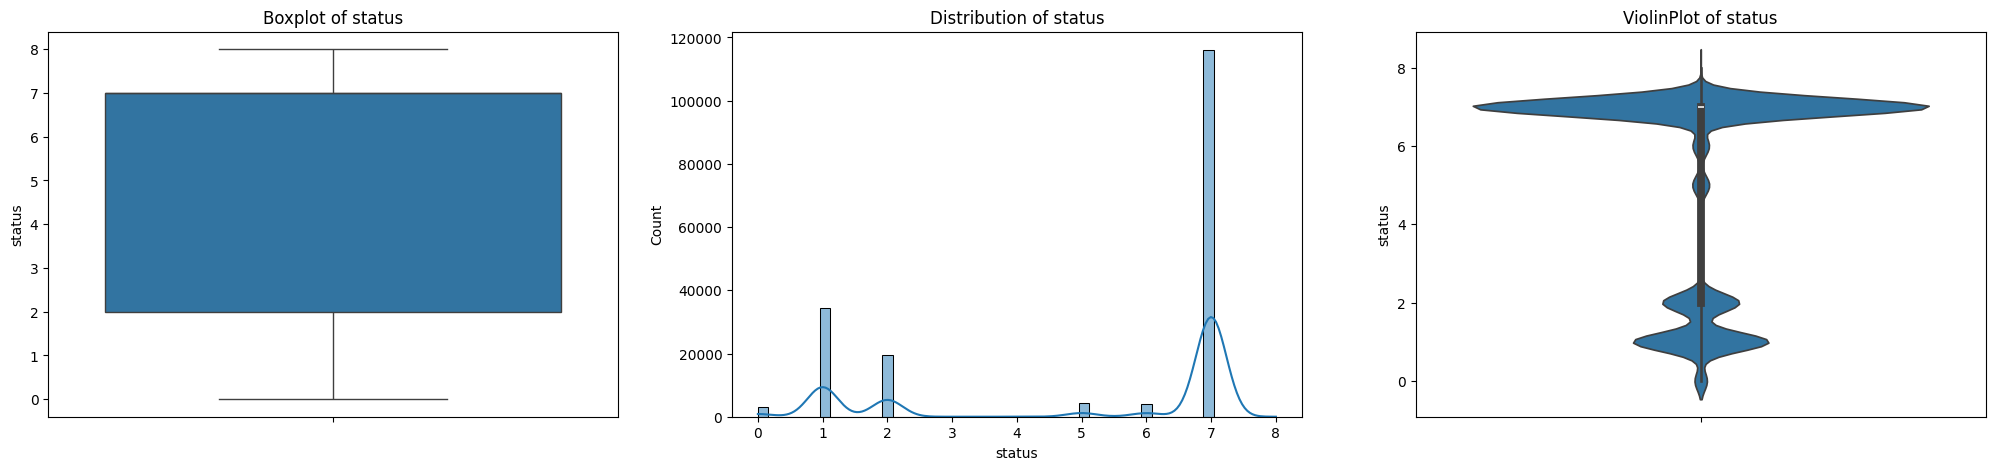

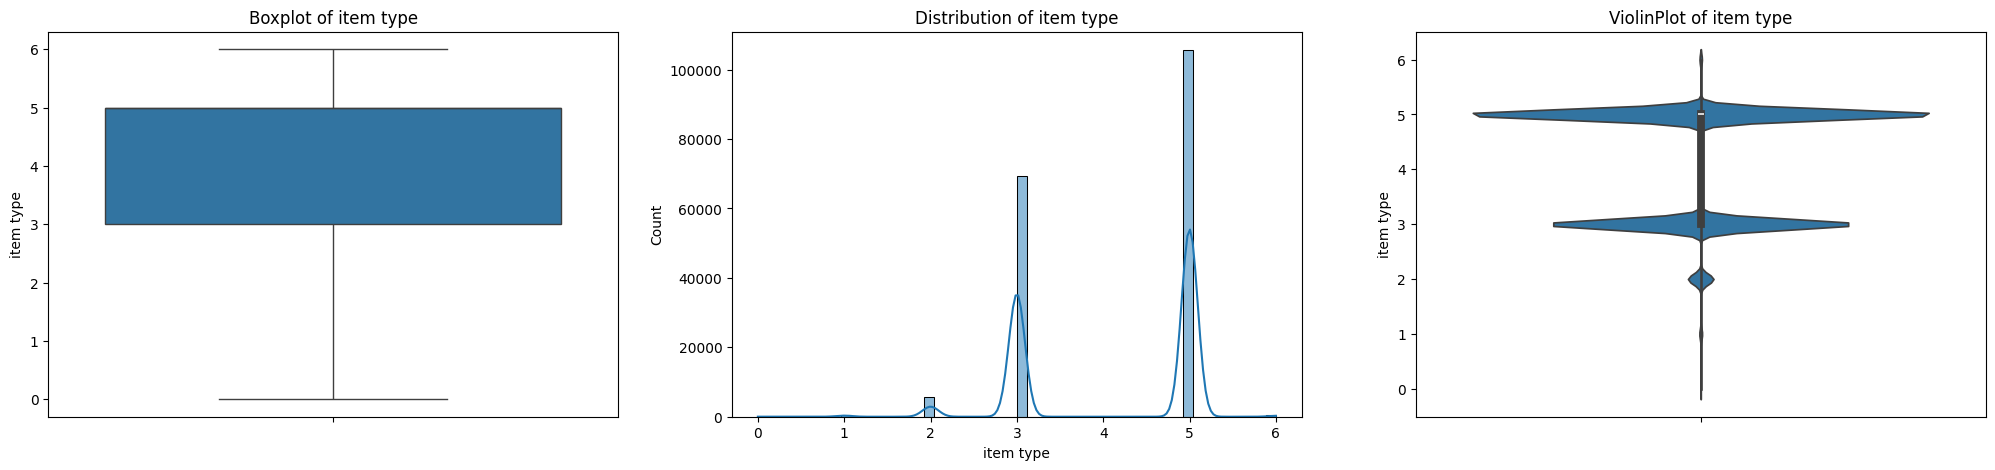

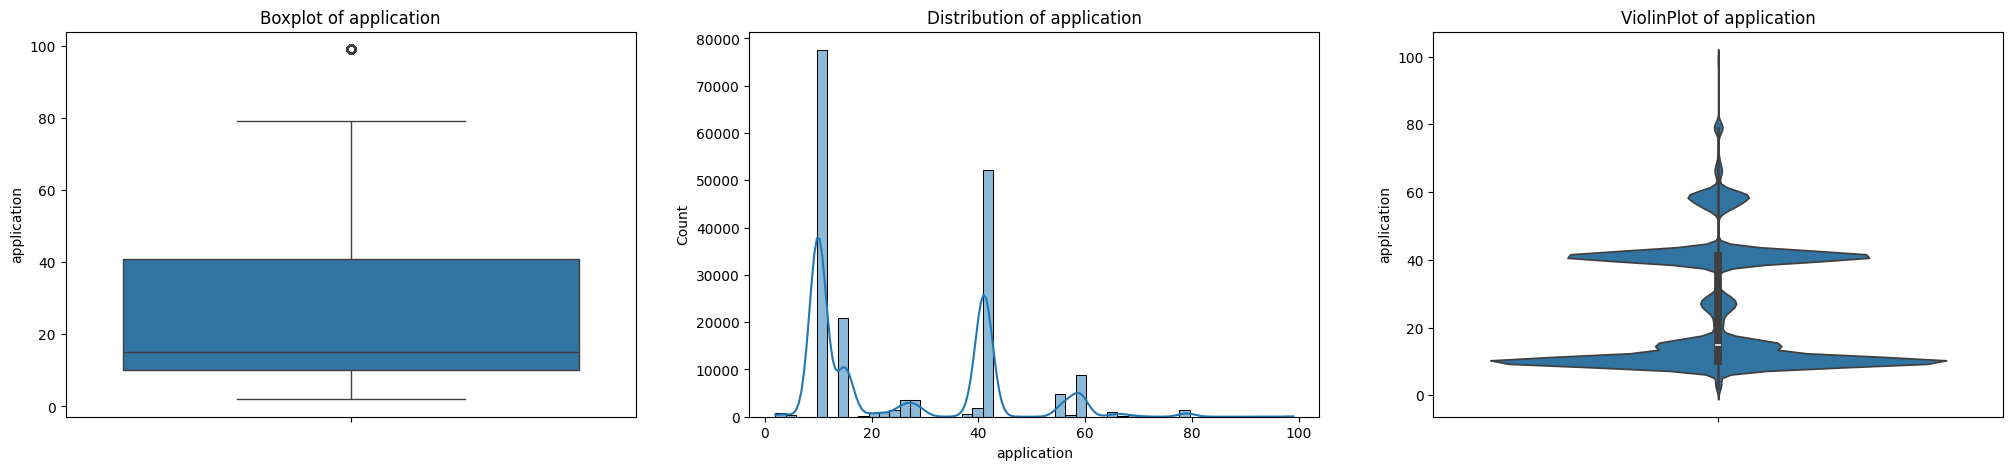

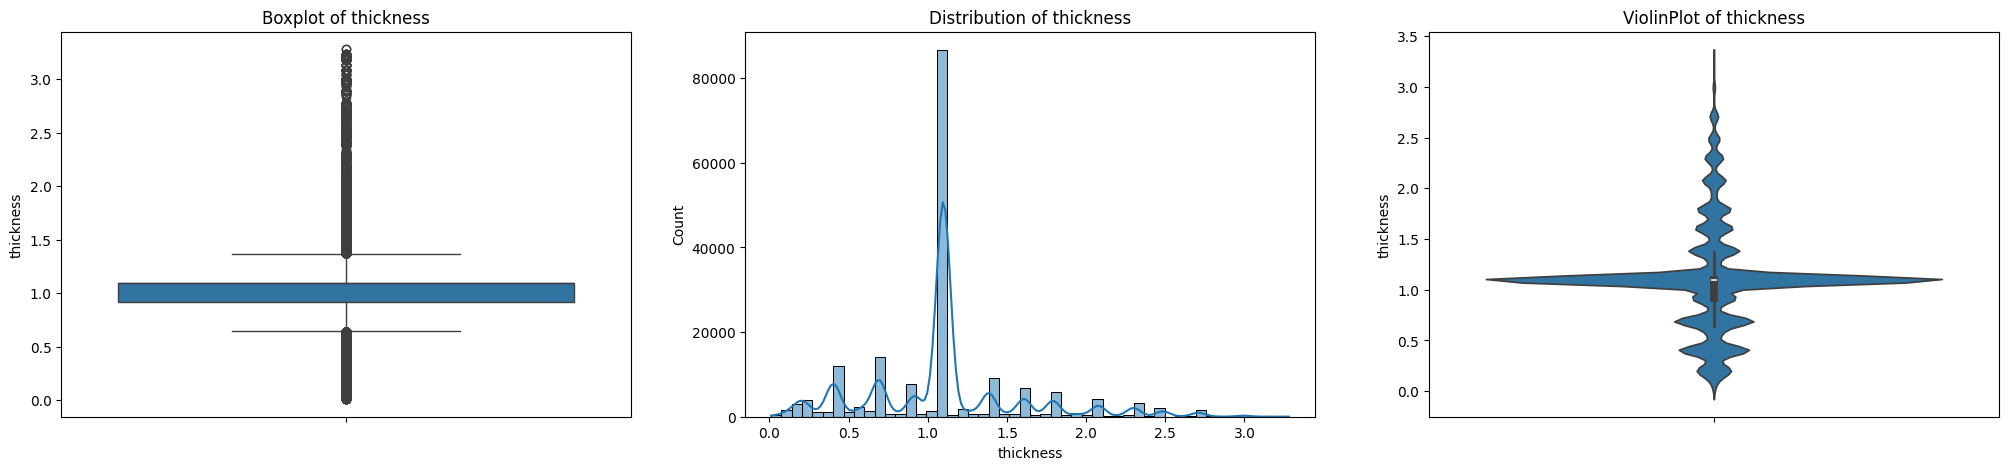

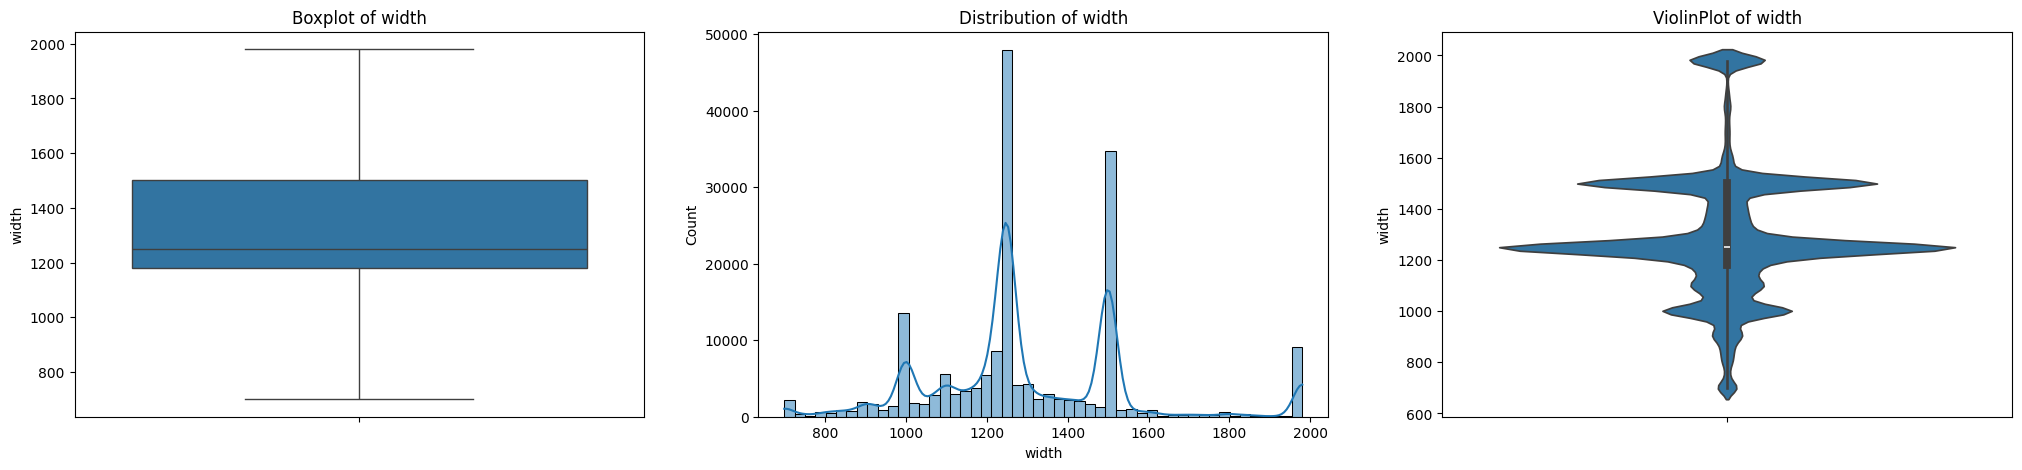

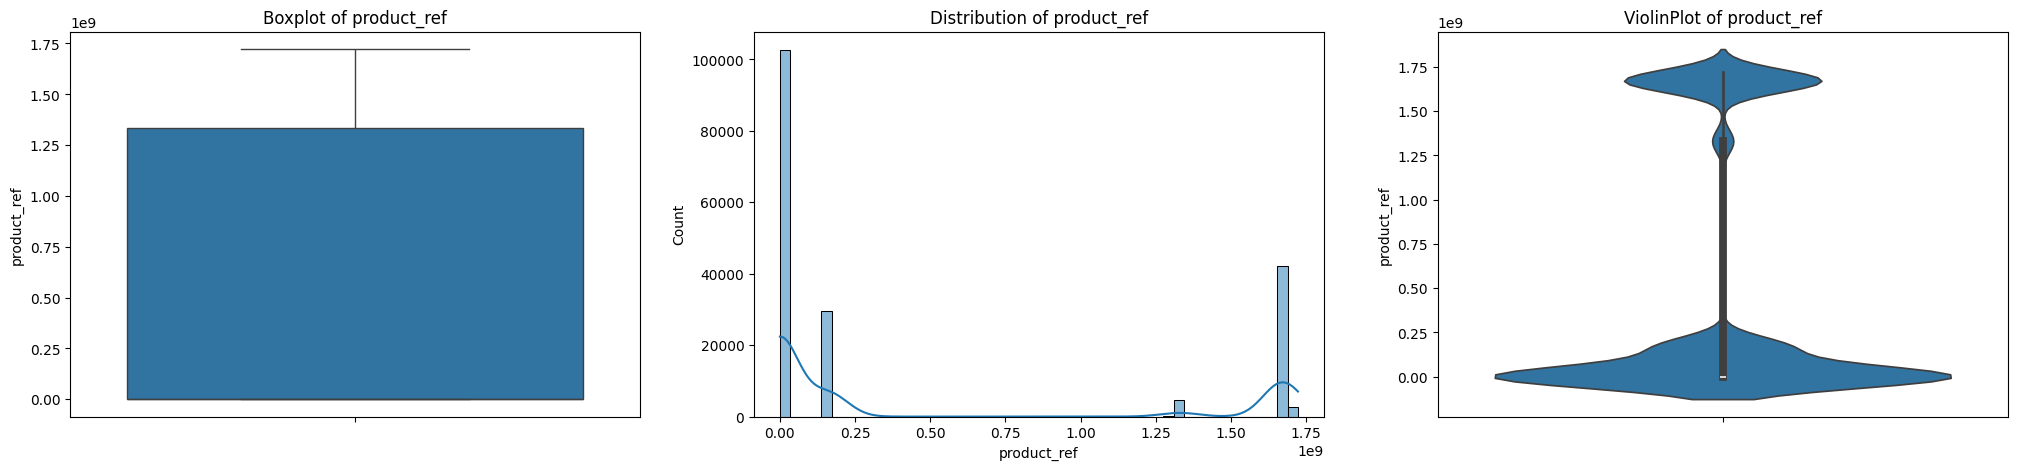

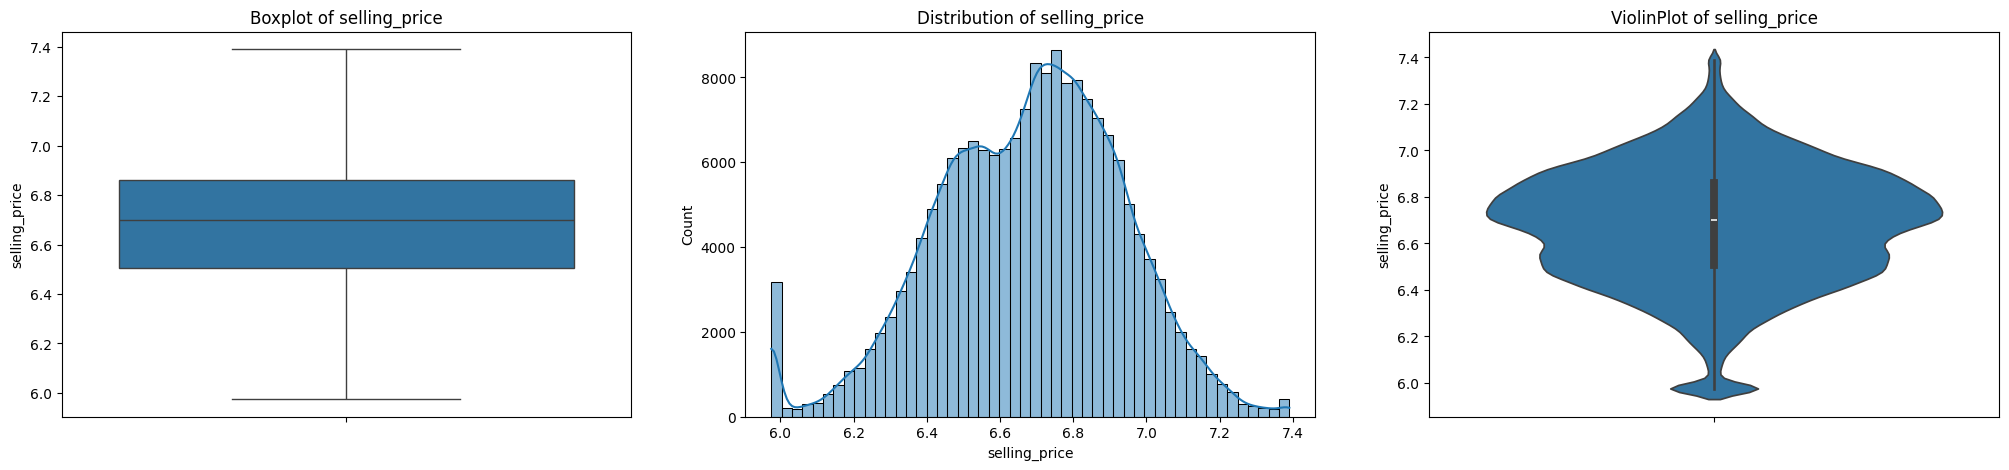

In [27]:
cols=['quantity tons', 'customer', 'country', 'status','item type', 'application', 'thickness', 'width', 'product_ref', 'selling_price']
for col in cols:
    plot_data(df,col)

In [ ]:
#Finding date difference between two dates and handling them if negative

In [23]:
df['date_diff']=(df['delivery date']-df['item_date']).dt.days
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,date_diff
0,2021-04-01,3.991779,30156308.0,28.0,7.0,5.0,10.0,0.693147,1500.0,1670798778,2021-07-01,6.749931,91
1,2021-04-01,6.643822,30202938.0,25.0,7.0,5.0,41.0,1.098612,1210.0,1668701718,2021-04-01,6.953684,0
2,2021-04-01,5.956169,30153963.0,30.0,7.0,6.0,28.0,1.098612,952.0,628377,2021-01-01,6.468211,-90
3,2021-04-01,5.310301,30349574.0,32.0,7.0,3.0,59.0,0.832909,1317.0,1668701718,2021-01-01,6.643790,-90
4,2021-04-01,6.666354,30211560.0,28.0,7.0,5.0,10.0,1.386294,1980.0,640665,2021-03-01,6.357842,-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,4.629691,30200854.0,25.0,7.0,5.0,41.0,1.098612,1220.0,164141591,2020-07-01,6.381816,-1
181669,2020-07-02,5.337954,30200854.0,25.0,7.0,5.0,41.0,1.098612,1500.0,164141591,2020-07-01,6.378426,-1
181670,2020-07-02,1.443523,30200854.0,25.0,7.0,5.0,41.0,1.098612,1250.0,164141591,2020-07-01,6.428105,-1
181671,2020-07-02,3.413291,30200854.0,25.0,7.0,5.0,41.0,1.098612,1250.0,164141591,2020-07-01,6.398595,-1


In [24]:
df.dtypes

item_date        datetime64[ns]
quantity tons           float64
customer                float64
country                 float64
status                  float64
item type               float64
application             float64
thickness               float64
width                   float64
product_ref               int64
delivery date    datetime64[ns]
selling_price           float64
date_diff                 int64
dtype: object

In [25]:
df['item_date_day'] = df['item_date'].dt.day
df['item_date_month'] = df['item_date'].dt.month
df['item_date_year'] = df['item_date'].dt.year
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,date_diff,item_date_day,item_date_month,item_date_year
0,2021-04-01,3.991779,30156308.0,28.0,7.0,5.0,10.0,0.693147,1500.0,1670798778,2021-07-01,6.749931,91,1,4,2021
1,2021-04-01,6.643822,30202938.0,25.0,7.0,5.0,41.0,1.098612,1210.0,1668701718,2021-04-01,6.953684,0,1,4,2021
2,2021-04-01,5.956169,30153963.0,30.0,7.0,6.0,28.0,1.098612,952.0,628377,2021-01-01,6.468211,-90,1,4,2021
3,2021-04-01,5.310301,30349574.0,32.0,7.0,3.0,59.0,0.832909,1317.0,1668701718,2021-01-01,6.643790,-90,1,4,2021
4,2021-04-01,6.666354,30211560.0,28.0,7.0,5.0,10.0,1.386294,1980.0,640665,2021-03-01,6.357842,-31,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,4.629691,30200854.0,25.0,7.0,5.0,41.0,1.098612,1220.0,164141591,2020-07-01,6.381816,-1,2,7,2020
181669,2020-07-02,5.337954,30200854.0,25.0,7.0,5.0,41.0,1.098612,1500.0,164141591,2020-07-01,6.378426,-1,2,7,2020
181670,2020-07-02,1.443523,30200854.0,25.0,7.0,5.0,41.0,1.098612,1250.0,164141591,2020-07-01,6.428105,-1,2,7,2020
181671,2020-07-02,3.413291,30200854.0,25.0,7.0,5.0,41.0,1.098612,1250.0,164141591,2020-07-01,6.398595,-1,2,7,2020


In [26]:
df_f2=df[df['date_diff']<0]
df_f2=df_f2.reset_index(drop=True)
df_f2

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,date_diff,item_date_day,item_date_month,item_date_year
0,2021-04-01,5.956169,30153963.0,30.0,7.0,6.0,28.0,1.098612,952.0,628377,2021-01-01,6.468211,-90,1,4,2021
1,2021-04-01,5.310301,30349574.0,32.0,7.0,3.0,59.0,0.832909,1317.0,1668701718,2021-01-01,6.643790,-90,1,4,2021
2,2021-04-01,6.666354,30211560.0,28.0,7.0,5.0,10.0,1.386294,1980.0,640665,2021-03-01,6.357842,-31,1,4,2021
3,2021-04-01,4.730808,30342192.0,32.0,7.0,5.0,41.0,1.098612,1220.0,611993,2021-01-01,6.836259,-90,1,4,2021
4,2021-04-01,4.736160,30342192.0,32.0,7.0,5.0,41.0,1.098612,1220.0,611993,2021-01-01,6.860664,-90,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16102,2020-07-02,4.629691,30200854.0,25.0,7.0,5.0,41.0,1.098612,1220.0,164141591,2020-07-01,6.381816,-1,2,7,2020
16103,2020-07-02,5.337954,30200854.0,25.0,7.0,5.0,41.0,1.098612,1500.0,164141591,2020-07-01,6.378426,-1,2,7,2020
16104,2020-07-02,1.443523,30200854.0,25.0,7.0,5.0,41.0,1.098612,1250.0,164141591,2020-07-01,6.428105,-1,2,7,2020
16105,2020-07-02,3.413291,30200854.0,25.0,7.0,5.0,41.0,1.098612,1250.0,164141591,2020-07-01,6.398595,-1,2,7,2020


In [27]:
df_f1=df[df['date_diff']>=0]
df_f1=df_f1.reset_index(drop=True)
df_f1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,date_diff,item_date_day,item_date_month,item_date_year
0,2021-04-01,3.991779,30156308.0,28.0,7.0,5.0,10.0,0.693147,1500.0,1670798778,2021-07-01,6.749931,91,1,4,2021
1,2021-04-01,6.643822,30202938.0,25.0,7.0,5.0,41.0,1.098612,1210.0,1668701718,2021-04-01,6.953684,0,1,4,2021
2,2021-04-01,5.419608,30202938.0,25.0,7.0,5.0,41.0,0.405465,1265.0,1668701718,2021-04-01,6.890609,0,1,4,2021
3,2021-04-01,1.259203,30209509.0,30.0,0.0,5.0,41.0,1.098612,1125.0,611993,2021-07-01,5.975038,91,1,4,2021
4,2021-04-01,4.235147,30341428.0,38.0,7.0,3.0,10.0,1.098612,1275.0,1668701376,2021-07-01,7.217443,91,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165561,2020-07-02,3.472467,30227718.0,25.0,1.0,3.0,15.0,1.791759,1980.0,640665,2020-08-01,6.313548,30,2,7,2020
165562,2020-07-02,4.196171,30161559.0,30.0,1.0,3.0,10.0,1.348073,1525.0,640665,2020-08-01,6.126869,30,2,7,2020
165563,2020-07-02,4.156686,30161559.0,30.0,1.0,3.0,10.0,1.766442,1525.0,640665,2020-08-01,6.124683,30,2,7,2020
165564,2020-07-02,4.025862,30161559.0,30.0,1.0,3.0,10.0,2.060514,1500.0,640665,2020-08-01,6.126869,30,2,7,2020


In [28]:
df_f1.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'date_diff', 'item_date_day',
       'item_date_month', 'item_date_year'],
      dtype='object')

In [29]:
df_f2.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'date_diff', 'item_date_day',
       'item_date_month', 'item_date_year'],
      dtype='object')

In [30]:
df_f1.dtypes

item_date          datetime64[ns]
quantity tons             float64
customer                  float64
country                   float64
status                    float64
item type                 float64
application               float64
thickness                 float64
width                     float64
product_ref                 int64
delivery date      datetime64[ns]
selling_price             float64
date_diff                   int64
item_date_day               int32
item_date_month             int32
item_date_year              int32
dtype: object

In [31]:
df_f2.dtypes

item_date          datetime64[ns]
quantity tons             float64
customer                  float64
country                   float64
status                    float64
item type                 float64
application               float64
thickness                 float64
width                     float64
product_ref                 int64
delivery date      datetime64[ns]
selling_price             float64
date_diff                   int64
item_date_day               int32
item_date_month             int32
item_date_year              int32
dtype: object

In [32]:
df_f1.isna().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
date_diff          0
item_date_day      0
item_date_month    0
item_date_year     0
dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

X=df_f1.drop(['item_date','delivery date','date_diff'],axis=1)
y=df_f1['date_diff']
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
models=[LinearRegression(),KNeighborsRegressor(),GradientBoostingRegressor(),RandomForestRegressor(),DecisionTreeRegressor()]
for i in range(1,6):
    for model in models:
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        print(f"****{type(model).__name__}****")
        print(f"R2Score: {r2_score(y_test,y_pred)}")

****LinearRegression****
R2Score: 0.36026884849986207
****KNeighborsRegressor****
R2Score: 0.7106677630471616
****GradientBoostingRegressor****
R2Score: 0.5562233947111632
****RandomForestRegressor****
R2Score: 0.9415261805277013
****DecisionTreeRegressor****
R2Score: 0.8947426473239919
****LinearRegression****
R2Score: 0.36026884849986207
****KNeighborsRegressor****
R2Score: 0.7106677630471616
****GradientBoostingRegressor****
R2Score: 0.5562932239822131
****RandomForestRegressor****
R2Score: 0.9413115960046617
****DecisionTreeRegressor****
R2Score: 0.8912751061100659
****LinearRegression****
R2Score: 0.36026884849986207
****KNeighborsRegressor****
R2Score: 0.7106677630471616
****GradientBoostingRegressor****
R2Score: 0.5562622780097899
****RandomForestRegressor****
R2Score: 0.9416463618494488
****DecisionTreeRegressor****
R2Score: 0.8938820776030313
****LinearRegression****
R2Score: 0.36026884849986207
****KNeighborsRegressor****
R2Score: 0.7106677630471616
****GradientBoostingRegres

In [ ]:
#RandomForestRegressor seems to be the best Model based on R2 Score

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X=df_f1.drop(['item_date','delivery date','date_diff'],axis=1)
y=df_f1['date_diff']
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
x_train

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,item_date_day,item_date_month,item_date_year
160570,3.214606,30207425.0,40.0,2.0,3.0,10.0,1.098612,1250.0,164141591,6.302619,14,7,2020
91158,3.992703,30197000.0,27.0,7.0,3.0,15.0,0.405465,1500.0,1332077137,6.626718,25,11,2020
1856,4.634052,30230920.0,77.0,7.0,3.0,41.0,1.098612,1250.0,164141591,6.985642,30,3,2021
105688,3.880744,30148347.0,27.0,2.0,3.0,41.0,1.098612,1250.0,611993,6.807935,4,11,2020
13613,3.160347,30267637.0,28.0,6.0,5.0,41.0,1.098612,1220.0,611993,7.060476,16,3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5141,3.273670,30205312.0,32.0,7.0,3.0,10.0,1.098612,1500.0,1668701718,6.934397,24,3,2021
135946,4.076309,30196886.0,84.0,7.0,3.0,10.0,1.098612,1448.0,1668701718,6.688355,11,9,2020
37034,2.201609,30199280.0,26.0,7.0,5.0,42.0,1.098612,1267.0,611993,7.077498,17,2,2021
49100,2.084555,30161088.0,78.0,7.0,5.0,10.0,0.405465,1100.0,628377,6.720220,28,1,2021


In [34]:
x1=df_f2.drop(['item_date','delivery date','date_diff'],axis=1)
x1

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,item_date_day,item_date_month,item_date_year
0,5.956169,30153963.0,30.0,7.0,6.0,28.0,1.098612,952.0,628377,6.468211,1,4,2021
1,5.310301,30349574.0,32.0,7.0,3.0,59.0,0.832909,1317.0,1668701718,6.643790,1,4,2021
2,6.666354,30211560.0,28.0,7.0,5.0,10.0,1.386294,1980.0,640665,6.357842,1,4,2021
3,4.730808,30342192.0,32.0,7.0,5.0,41.0,1.098612,1220.0,611993,6.836259,1,4,2021
4,4.736160,30342192.0,32.0,7.0,5.0,41.0,1.098612,1220.0,611993,6.860664,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16102,4.629691,30200854.0,25.0,7.0,5.0,41.0,1.098612,1220.0,164141591,6.381816,2,7,2020
16103,5.337954,30200854.0,25.0,7.0,5.0,41.0,1.098612,1500.0,164141591,6.378426,2,7,2020
16104,1.443523,30200854.0,25.0,7.0,5.0,41.0,1.098612,1250.0,164141591,6.428105,2,7,2020
16105,3.413291,30200854.0,25.0,7.0,5.0,41.0,1.098612,1250.0,164141591,6.398595,2,7,2020


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X=df_f1.drop(['item_date','delivery date','date_diff'],axis=1)
y=df_f1['date_diff']
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(x_train,y_train)
x1=df_f2.drop(['item_date','delivery date','date_diff'],axis=1)
y_pred=model.predict(x1)
y_pred_list=y_pred.tolist()

In [36]:
y_pred_list

[63.17,
 106.41,
 93.25,
 141.25,
 141.25,
 146.15,
 145.84,
 145.84,
 98.74,
 138.42,
 137.2,
 58.63,
 58.32,
 60.09,
 57.53,
 57.53,
 57.04,
 59.47,
 57.23,
 57.53,
 63.49,
 108.58,
 57.53,
 58.33,
 79.62,
 79.09,
 108.24,
 114.41,
 57.77,
 137.85,
 58.54,
 59.54,
 58.38,
 63.04,
 63.84,
 36.47,
 103.79,
 93.41,
 99.76,
 100.55,
 103.37,
 68.0,
 68.0,
 65.87,
 64.92,
 63.9,
 75.33,
 68.68,
 68.33,
 65.5,
 63.17,
 24.0,
 95.91,
 4.6,
 8.45,
 61.03,
 44.92,
 45.7,
 44.0,
 83.69,
 89.8,
 90.63,
 68.93,
 55.16,
 70.92,
 70.98,
 64.49,
 40.24,
 47.12,
 35.6,
 63.51,
 64.62,
 64.91,
 80.32,
 16.97,
 15.11,
 39.12,
 38.21,
 93.8,
 40.63,
 46.57,
 54.61,
 122.15,
 122.3,
 118.39,
 117.85,
 118.66,
 102.62,
 61.03,
 25.56,
 89.63,
 75.79,
 83.36,
 83.99,
 95.83,
 25.21,
 76.08,
 74.43,
 77.04,
 72.38,
 69.4,
 73.94,
 76.23,
 73.72,
 70.96,
 111.26,
 108.6,
 70.69,
 42.78,
 42.55,
 31.19,
 105.89,
 112.22,
 113.14,
 53.65,
 41.7,
 39.65,
 41.05,
 41.05,
 111.5,
 97.38,
 107.9,
 123.4,
 44.81,


In [37]:
date_diff_1=[int(round(i,0))for i in y_pred_list]
date_diff_1

[63,
 106,
 93,
 141,
 141,
 146,
 146,
 146,
 99,
 138,
 137,
 59,
 58,
 60,
 58,
 58,
 57,
 59,
 57,
 58,
 63,
 109,
 58,
 58,
 80,
 79,
 108,
 114,
 58,
 138,
 59,
 60,
 58,
 63,
 64,
 36,
 104,
 93,
 100,
 101,
 103,
 68,
 68,
 66,
 65,
 64,
 75,
 69,
 68,
 66,
 63,
 24,
 96,
 5,
 8,
 61,
 45,
 46,
 44,
 84,
 90,
 91,
 69,
 55,
 71,
 71,
 64,
 40,
 47,
 36,
 64,
 65,
 65,
 80,
 17,
 15,
 39,
 38,
 94,
 41,
 47,
 55,
 122,
 122,
 118,
 118,
 119,
 103,
 61,
 26,
 90,
 76,
 83,
 84,
 96,
 25,
 76,
 74,
 77,
 72,
 69,
 74,
 76,
 74,
 71,
 111,
 109,
 71,
 43,
 43,
 31,
 106,
 112,
 113,
 54,
 42,
 40,
 41,
 41,
 112,
 97,
 108,
 123,
 45,
 27,
 41,
 41,
 30,
 110,
 111,
 111,
 108,
 101,
 24,
 22,
 82,
 82,
 36,
 94,
 82,
 82,
 123,
 82,
 121,
 94,
 92,
 94,
 82,
 98,
 109,
 43,
 43,
 46,
 24,
 19,
 21,
 46,
 123,
 96,
 112,
 96,
 34,
 105,
 105,
 103,
 105,
 103,
 102,
 103,
 103,
 103,
 103,
 103,
 103,
 85,
 103,
 94,
 91,
 23,
 59,
 113,
 82,
 88,
 26,
 64,
 109,
 93,
 107,
 109,


In [38]:
df_f2['date_diff']=pd.DataFrame(date_diff_1)

In [39]:
df_f2

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,date_diff,item_date_day,item_date_month,item_date_year
0,2021-04-01,5.956169,30153963.0,30.0,7.0,6.0,28.0,1.098612,952.0,628377,2021-01-01,6.468211,63,1,4,2021
1,2021-04-01,5.310301,30349574.0,32.0,7.0,3.0,59.0,0.832909,1317.0,1668701718,2021-01-01,6.643790,106,1,4,2021
2,2021-04-01,6.666354,30211560.0,28.0,7.0,5.0,10.0,1.386294,1980.0,640665,2021-03-01,6.357842,93,1,4,2021
3,2021-04-01,4.730808,30342192.0,32.0,7.0,5.0,41.0,1.098612,1220.0,611993,2021-01-01,6.836259,141,1,4,2021
4,2021-04-01,4.736160,30342192.0,32.0,7.0,5.0,41.0,1.098612,1220.0,611993,2021-01-01,6.860664,141,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16102,2020-07-02,4.629691,30200854.0,25.0,7.0,5.0,41.0,1.098612,1220.0,164141591,2020-07-01,6.381816,43,2,7,2020
16103,2020-07-02,5.337954,30200854.0,25.0,7.0,5.0,41.0,1.098612,1500.0,164141591,2020-07-01,6.378426,41,2,7,2020
16104,2020-07-02,1.443523,30200854.0,25.0,7.0,5.0,41.0,1.098612,1250.0,164141591,2020-07-01,6.428105,45,2,7,2020
16105,2020-07-02,3.413291,30200854.0,25.0,7.0,5.0,41.0,1.098612,1250.0,164141591,2020-07-01,6.398595,44,2,7,2020


In [40]:
df_f2['item_date'] = pd.to_datetime(df_f2['item_date'])
df_f2['delivery date'] = df_f2['item_date'] + pd.to_timedelta(df_f2['date_diff'], unit='D')
df_f2

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,date_diff,item_date_day,item_date_month,item_date_year
0,2021-04-01,5.956169,30153963.0,30.0,7.0,6.0,28.0,1.098612,952.0,628377,2021-06-03,6.468211,63,1,4,2021
1,2021-04-01,5.310301,30349574.0,32.0,7.0,3.0,59.0,0.832909,1317.0,1668701718,2021-07-16,6.643790,106,1,4,2021
2,2021-04-01,6.666354,30211560.0,28.0,7.0,5.0,10.0,1.386294,1980.0,640665,2021-07-03,6.357842,93,1,4,2021
3,2021-04-01,4.730808,30342192.0,32.0,7.0,5.0,41.0,1.098612,1220.0,611993,2021-08-20,6.836259,141,1,4,2021
4,2021-04-01,4.736160,30342192.0,32.0,7.0,5.0,41.0,1.098612,1220.0,611993,2021-08-20,6.860664,141,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16102,2020-07-02,4.629691,30200854.0,25.0,7.0,5.0,41.0,1.098612,1220.0,164141591,2020-08-14,6.381816,43,2,7,2020
16103,2020-07-02,5.337954,30200854.0,25.0,7.0,5.0,41.0,1.098612,1500.0,164141591,2020-08-12,6.378426,41,2,7,2020
16104,2020-07-02,1.443523,30200854.0,25.0,7.0,5.0,41.0,1.098612,1250.0,164141591,2020-08-16,6.428105,45,2,7,2020
16105,2020-07-02,3.413291,30200854.0,25.0,7.0,5.0,41.0,1.098612,1250.0,164141591,2020-08-15,6.398595,44,2,7,2020


In [41]:
df_final=pd.concat([df_f1, df_f2], ignore_index=True)

In [42]:
df_final

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,date_diff,item_date_day,item_date_month,item_date_year
0,2021-04-01,3.991779,30156308.0,28.0,7.0,5.0,10.0,0.693147,1500.0,1670798778,2021-07-01,6.749931,91,1,4,2021
1,2021-04-01,6.643822,30202938.0,25.0,7.0,5.0,41.0,1.098612,1210.0,1668701718,2021-04-01,6.953684,0,1,4,2021
2,2021-04-01,5.419608,30202938.0,25.0,7.0,5.0,41.0,0.405465,1265.0,1668701718,2021-04-01,6.890609,0,1,4,2021
3,2021-04-01,1.259203,30209509.0,30.0,0.0,5.0,41.0,1.098612,1125.0,611993,2021-07-01,5.975038,91,1,4,2021
4,2021-04-01,4.235147,30341428.0,38.0,7.0,3.0,10.0,1.098612,1275.0,1668701376,2021-07-01,7.217443,91,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,4.629691,30200854.0,25.0,7.0,5.0,41.0,1.098612,1220.0,164141591,2020-08-14,6.381816,43,2,7,2020
181669,2020-07-02,5.337954,30200854.0,25.0,7.0,5.0,41.0,1.098612,1500.0,164141591,2020-08-12,6.378426,41,2,7,2020
181670,2020-07-02,1.443523,30200854.0,25.0,7.0,5.0,41.0,1.098612,1250.0,164141591,2020-08-16,6.428105,45,2,7,2020
181671,2020-07-02,3.413291,30200854.0,25.0,7.0,5.0,41.0,1.098612,1250.0,164141591,2020-08-15,6.398595,44,2,7,2020


In [43]:
df_final['delivery_date_day'] = df_final['delivery date'].dt.day
df_final['delivery_date_month'] = df_final['delivery date'].dt.month
df_final['delivery_date_year'] = df_final['delivery date'].dt.year
df_final

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,date_diff,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,2021-04-01,3.991779,30156308.0,28.0,7.0,5.0,10.0,0.693147,1500.0,1670798778,2021-07-01,6.749931,91,1,4,2021,1,7,2021
1,2021-04-01,6.643822,30202938.0,25.0,7.0,5.0,41.0,1.098612,1210.0,1668701718,2021-04-01,6.953684,0,1,4,2021,1,4,2021
2,2021-04-01,5.419608,30202938.0,25.0,7.0,5.0,41.0,0.405465,1265.0,1668701718,2021-04-01,6.890609,0,1,4,2021,1,4,2021
3,2021-04-01,1.259203,30209509.0,30.0,0.0,5.0,41.0,1.098612,1125.0,611993,2021-07-01,5.975038,91,1,4,2021,1,7,2021
4,2021-04-01,4.235147,30341428.0,38.0,7.0,3.0,10.0,1.098612,1275.0,1668701376,2021-07-01,7.217443,91,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,4.629691,30200854.0,25.0,7.0,5.0,41.0,1.098612,1220.0,164141591,2020-08-14,6.381816,43,2,7,2020,14,8,2020
181669,2020-07-02,5.337954,30200854.0,25.0,7.0,5.0,41.0,1.098612,1500.0,164141591,2020-08-12,6.378426,41,2,7,2020,12,8,2020
181670,2020-07-02,1.443523,30200854.0,25.0,7.0,5.0,41.0,1.098612,1250.0,164141591,2020-08-16,6.428105,45,2,7,2020,16,8,2020
181671,2020-07-02,3.413291,30200854.0,25.0,7.0,5.0,41.0,1.098612,1250.0,164141591,2020-08-15,6.398595,44,2,7,2020,15,8,2020


In [44]:
df_final.dtypes

item_date              datetime64[ns]
quantity tons                 float64
customer                      float64
country                       float64
status                        float64
item type                     float64
application                   float64
thickness                     float64
width                         float64
product_ref                     int64
delivery date          datetime64[ns]
selling_price                 float64
date_diff                       int64
item_date_day                   int32
item_date_month                 int32
item_date_year                  int32
delivery_date_day               int32
delivery_date_month             int32
delivery_date_year              int32
dtype: object

In [45]:
df_final.drop(['delivery date','item_date','date_diff'],axis=1,inplace=True)

In [46]:
df_final.to_csv("C:/Users/Dharmarajan/Documents/Guvi/Project/Project 4/Final Data for Regression.csv")

In [47]:
df_final["customer"].unique()

array([30156308., 30202938., 30209509., ..., 30297241., 30406633.,
       30356490.])

In [ ]:
#Taking required data into seperate data frame for the classification model

In [48]:
df_class=df_final[(df_final.status==7)|(df_final.status==1)]
df_class=df_class.reset_index(drop=True)
df_class

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,3.991779,30156308.0,28.0,7.0,5.0,10.0,0.693147,1500.0,1670798778,6.749931,1,4,2021,1,7,2021
1,6.643822,30202938.0,25.0,7.0,5.0,41.0,1.098612,1210.0,1668701718,6.953684,1,4,2021,1,4,2021
2,5.419608,30202938.0,25.0,7.0,5.0,41.0,0.405465,1265.0,1668701718,6.890609,1,4,2021,1,4,2021
3,4.235147,30341428.0,38.0,7.0,3.0,10.0,1.098612,1275.0,1668701376,7.217443,1,4,2021,1,7,2021
4,6.446714,30202938.0,25.0,7.0,5.0,41.0,0.405465,1165.0,1668701718,6.890609,1,4,2021,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150445,4.629691,30200854.0,25.0,7.0,5.0,41.0,1.098612,1220.0,164141591,6.381816,2,7,2020,14,8,2020
150446,5.337954,30200854.0,25.0,7.0,5.0,41.0,1.098612,1500.0,164141591,6.378426,2,7,2020,12,8,2020
150447,1.443523,30200854.0,25.0,7.0,5.0,41.0,1.098612,1250.0,164141591,6.428105,2,7,2020,16,8,2020
150448,3.413291,30200854.0,25.0,7.0,5.0,41.0,1.098612,1250.0,164141591,6.398595,2,7,2020,15,8,2020


In [49]:
df_class.to_csv("C:/Users/Dharmarajan/Documents/Guvi/Project/Project 4/Final Data for Classification.csv")

In [ ]:
#df_class for classification data 
#df_final for Regression data

In [ ]:
#Identify best algorithm for regression

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

X=df_final.drop(['selling_price'],axis=1)
y=df_final['selling_price']
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
train={'LinearRegression':[],'KNeighborsRegressor':[],'GradientBoostingRegressor':[],'RandomForestRegressor':[],'DecisionTreeRegressor':[]}
test={'LinearRegression':[],'KNeighborsRegressor':[],'GradientBoostingRegressor':[],'RandomForestRegressor':[],'DecisionTreeRegressor':[]}
models=[LinearRegression(),KNeighborsRegressor(),GradientBoostingRegressor(),RandomForestRegressor(),DecisionTreeRegressor()]
for i in range(1,6):
    for model in models:
        model.fit(x_train,y_train)
        train_pred=model.predict(x_train)
        test_pred=model.predict(x_test)
        print(f"****{type(model).__name__}****")         
        train[type(model).__name__].append(r2_score(y_train,train_pred))
        test[type(model).__name__].append(r2_score(y_test,test_pred))
        print(f"R2Score_Train: {r2_score(y_train,train_pred)}")
        print(f"R2Score_Test: {r2_score(y_test,test_pred)}")

****LinearRegression****
R2Score_Train: 0.40282568141043507
R2Score_Test: 0.40334999232018653
****KNeighborsRegressor****
R2Score_Train: 0.8513252587497014
R2Score_Test: 0.7459150575472624
****GradientBoostingRegressor****
R2Score_Train: 0.8856560715300049
R2Score_Test: 0.8856429667473696
****RandomForestRegressor****
R2Score_Train: 0.9936389908849342
R2Score_Test: 0.9559486969617497
****DecisionTreeRegressor****
R2Score_Train: 0.9998000435393892
R2Score_Test: 0.9259072518100991
****LinearRegression****
R2Score_Train: 0.40282568141043507
R2Score_Test: 0.40334999232018653
****KNeighborsRegressor****
R2Score_Train: 0.8513252587497014
R2Score_Test: 0.7459150575472624
****GradientBoostingRegressor****
R2Score_Train: 0.8856560715300049
R2Score_Test: 0.8856429667473695
****RandomForestRegressor****
R2Score_Train: 0.9936365618147562
R2Score_Test: 0.9562366791585954
****DecisionTreeRegressor****
R2Score_Train: 0.9998000435393892
R2Score_Test: 0.9267960849133214
****LinearRegression****
R2Score

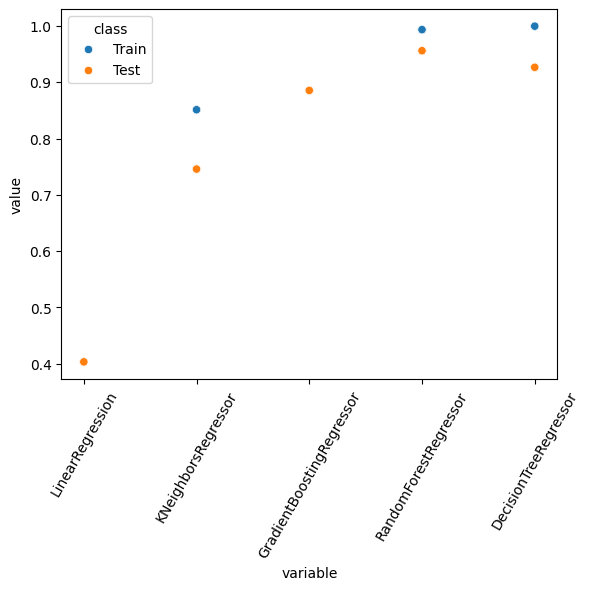

   LinearRegression  KNeighborsRegressor  GradientBoostingRegressor  \
0          0.402826             0.851325                   0.885656   
1          0.402826             0.851325                   0.885656   
2          0.402826             0.851325                   0.885656   
3          0.402826             0.851325                   0.885656   
4          0.402826             0.851325                   0.885656   
0          0.403350             0.745915                   0.885643   
1          0.403350             0.745915                   0.885643   
2          0.403350             0.745915                   0.885643   
3          0.403350             0.745915                   0.885643   
4          0.403350             0.745915                   0.885643   

   RandomForestRegressor  DecisionTreeRegressor  class  
0               0.993639               0.999800  Train  
1               0.993637               0.999800  Train  
2               0.993623               0.999800

In [73]:
df1=pd.DataFrame(train)
df2=pd.DataFrame(test)
df1['class']='Train'
df2['class']='Test'
df_analyse=pd.concat([df1,df2])
op=pd.melt(df_analyse,id_vars=['class'],value_vars=['LinearRegression','KNeighborsRegressor','GradientBoostingRegressor','RandomForestRegressor','DecisionTreeRegressor'])
sns.scatterplot(data=op,x='variable',y='value',hue='class')
plt.xticks(rotation=60)
plt.show()
print(df_analyse)

In [ ]:
#RandomForestRegressor has the better R2 Score in Train and Test when compared to others

In [ ]:
#Identifying best hyper parameter values using RandomisedSearchCV

In [76]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

X=df_final.drop(['selling_price'],axis=1)
y=df_final['selling_price']
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
param_grid = { 
            'max_depth'      : [5,10,20,50],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf' : [1, 2, 4],
            'max_features'     : ['sqrt', 'log2', None],
            'n_estimators'      : [15,25,35]
            }
random_search= RandomizedSearchCV(estimator=RandomForestRegressor(),param_distributions=param_grid,n_iter=50,random_state=42, n_jobs=-1, cv=3,error_score='raise',refit=True)
random_search.fit(X,y)
print(random_search.best_score_ )
print(random_search.best_params_)

0.5177451495055121
{'n_estimators': 15, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10}


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,root_mean_squared_error,r2_score

X=df_final.drop(['selling_price'],axis=1)
y=df_final['selling_price']
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)
print("**MSE**")
print(mean_squared_error(y_train,train_pred))
print(mean_squared_error(y_test,test_pred))
print("**RSME**")
print(root_mean_squared_error(y_train,train_pred))
print(root_mean_squared_error(y_test,test_pred))
print("**R2 Score**")
print(r2_score(y_train,train_pred))
print(r2_score(y_test,test_pred))

**MSE**
0.0004145425543652435
0.00285085310604339
**RSME**
0.0203603181302563
0.053393380732478346
**R2 Score**
0.9936475036183432
0.9561841081029332


In [ ]:
#Actual Model for regression

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,root_mean_squared_error,r2_score

X=df_final.drop(['selling_price'],axis=1)
y=df_final['selling_price']
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
model=RandomForestRegressor(max_features=None,min_samples_split=14,n_estimators=35,max_depth=50,min_samples_leaf=2)
model.fit(x_train,y_train)
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)
print("**MSE**")
print(mean_squared_error(y_train,train_pred))
print(mean_squared_error(y_test,test_pred))
print("**RSME**")
print(root_mean_squared_error(y_train,train_pred))
print(root_mean_squared_error(y_test,test_pred))
print("**R2 Score**")
print(r2_score(y_train,train_pred))
print(r2_score(y_test,test_pred))

**MSE**
0.001609910007458574
0.0029770120519860524
**RSME**
0.04012368387197982
0.05456200190596064
**R2 Score**
0.9753017511091923
0.9544509153401403


In [53]:
import pickle
with open('C:/Users/Dharmarajan/Documents/Guvi/Project/Project 4/SellingPrice_Regression.pkl','wb') as fn:
    pickle.dump(model,fn)

In [54]:
df_final.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,3.991779,30156308.0,28.0,7.0,5.0,10.0,0.693147,1500.0,1670798778,6.749931,1,4,2021,1,7,2021
1,6.643822,30202938.0,25.0,7.0,5.0,41.0,1.098612,1210.0,1668701718,6.953684,1,4,2021,1,4,2021
2,5.419608,30202938.0,25.0,7.0,5.0,41.0,0.405465,1265.0,1668701718,6.890609,1,4,2021,1,4,2021
3,1.259203,30209509.0,30.0,0.0,5.0,41.0,1.098612,1125.0,611993,5.975038,1,4,2021,1,7,2021
4,4.235147,30341428.0,38.0,7.0,3.0,10.0,1.098612,1275.0,1668701376,7.217443,1,4,2021,1,7,2021


In [ ]:
#(3.991779,30156308.0,28.0,7.0,5.0,10.0,0.693147,1500.0,1670798778,1,4,2021,1,7,2021) 	6.749931
#(6.643822,30202938.0,25.0,7.0,5.0,41.0,1.100582,1210.0,1668701718,1,4,2021,1,4,2021)   6.953684
#(5.419608,30202938.0,25.0,7.0,5.0,41.0,0.405465,1265.0,1668701718,1,4,2021,1,4,2021)  6.890609

In [55]:
column_names = df_final.columns.tolist()
column_names

['quantity tons',
 'customer',
 'country',
 'status',
 'item type',
 'application',
 'thickness',
 'width',
 'product_ref',
 'selling_price',
 'item_date_day',
 'item_date_month',
 'item_date_year',
 'delivery_date_day',
 'delivery_date_month',
 'delivery_date_year']

In [56]:
x_train.columns.tolist()

['quantity tons',
 'customer',
 'country',
 'status',
 'item type',
 'application',
 'thickness',
 'width',
 'product_ref',
 'item_date_day',
 'item_date_month',
 'item_date_year',
 'delivery_date_day',
 'delivery_date_month',
 'delivery_date_year']

In [57]:
user_input = np.array([[3.991779, 30156308.0, 28.0, 7.0, 5.0, 10.0, 0.693147, 1500.0, 1670798778, 1, 4, 2021, 1, 7, 2021]])
SP=model.predict(user_input)
SP[0]
#array([6.79203581])
#array([6.78945422])

c:\Users\Dharmarajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


6.820037372082666

In [58]:
user_input = np.array([[3.991779,30156308.0,28.0,7.0,5.0,10.0,0.693147,1500.0,1670798778,1,4,2021,1,7,2021]])
SP=model.predict(user_input)
SP[0]
#array([6.79203581])
#array([6.78945422])

c:\Users\Dharmarajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


6.820037372082666

In [60]:
import pickle
with open('C:/Users/Dharmarajan/Documents/Guvi/Project/Project 4/SellingPrice_Regression.pkl','rb') as fn:
    sp_model=pickle.load(fn)

In [61]:
user_input = np.array([[3.991779,30156308.0,28.0,7.0,5.0,10.0,0.693147,1500.0,1670798778,1,4,2021,1,7,2021]])
SP=sp_model.predict(user_input)
SP[0]

c:\Users\Dharmarajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


6.820037372082666

In [62]:
df_class['status'].value_counts()

status
7.0    116012
1.0     34438
Name: count, dtype: int64

In [ ]:
#Finding best algorithm for Classification

In [113]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt

X=df_class.drop(['status'],axis=1)
y=df_class['status']
model=SMOTE()
X_new,y_new=model.fit_resample(X,y)
x_train, x_test, y_train, y_test=train_test_split(X_new,y_new,test_size=0.2)
train_cls={'LogisticRegression':[],'KNeighborsClassifier':[],'GradientBoostingClassifier':[],'RandomForestClassifier':[],'DecisionTreeClassifier':[]}
test_cls={'LogisticRegression':[],'KNeighborsClassifier':[],'GradientBoostingClassifier':[],'RandomForestClassifier':[],'DecisionTreeClassifier':[]}
models=[LogisticRegression(),KNeighborsClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),DecisionTreeClassifier()]
for i in range(1,6):
    for model in models:
        model.fit(x_train,y_train)
        train_pred=model.predict(x_train)
        test_pred=model.predict(x_test)
        print(f"****{type(model).__name__}****")         
        train_cls[type(model).__name__].append(f1_score(y_train,train_pred))
        test_cls[type(model).__name__].append(f1_score(y_test,test_pred))
        print(f"F1Score_Train: {f1_score(y_train,train_pred)}")
        print(f"F1Score_Test: {f1_score(y_test,test_pred)}")

****LogisticRegression****
F1Score_Train: 0.42786446874047995
F1Score_Test: 0.4217126863663276
****KNeighborsClassifier****
F1Score_Train: 0.9589241820141325
F1Score_Test: 0.9399941252989803
****GradientBoostingClassifier****
F1Score_Train: 0.8223409690879673
F1Score_Test: 0.8242036069442104
****RandomForestClassifier****
F1Score_Train: 0.9999946039574577
F1Score_Test: 0.9799159271368519
****DecisionTreeClassifier****
F1Score_Train: 1.0
F1Score_Test: 0.9634868069650678
****LogisticRegression****
F1Score_Train: 0.42786446874047995
F1Score_Test: 0.4217126863663276
****KNeighborsClassifier****
F1Score_Train: 0.9589241820141325
F1Score_Test: 0.9399941252989803
****GradientBoostingClassifier****
F1Score_Train: 0.8223409690879673
F1Score_Test: 0.8242036069442104
****RandomForestClassifier****
F1Score_Train: 0.9999946039574577
F1Score_Test: 0.9799439109373672
****DecisionTreeClassifier****
F1Score_Train: 1.0
F1Score_Test: 0.9630975797485675
****LogisticRegression****
F1Score_Train: 0.42786446

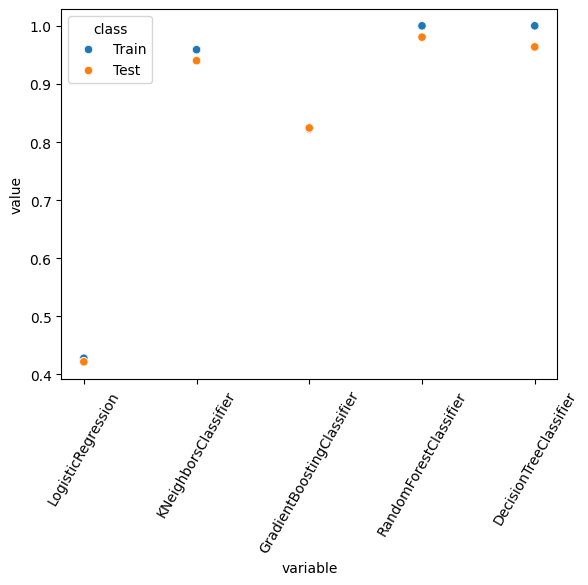

   LogisticRegression  KNeighborsClassifier  GradientBoostingClassifier  \
0            0.427864              0.958924                    0.822341   
1            0.427864              0.958924                    0.822341   
2            0.427864              0.958924                    0.822341   
3            0.427864              0.958924                    0.822341   
4            0.427864              0.958924                    0.822341   
0            0.421713              0.939994                    0.824204   
1            0.421713              0.939994                    0.824204   
2            0.421713              0.939994                    0.824204   
3            0.421713              0.939994                    0.824204   
4            0.421713              0.939994                    0.824204   

   RandomForestClassifier  DecisionTreeClassifier  class  
0                0.999995                1.000000  Train  
1                0.999995                1.000000  Train

In [114]:
df1_c=pd.DataFrame(train_cls)
df2_c=pd.DataFrame(test_cls)
df1_c['class']='Train'
df2_c['class']='Test'
dfc_analyse=pd.concat([df1_c,df2_c])
op=pd.melt(dfc_analyse,id_vars=['class'],value_vars=['LogisticRegression','KNeighborsClassifier','GradientBoostingClassifier','RandomForestClassifier','DecisionTreeClassifier'])
sns.scatterplot(data=op,x='variable',y='value',hue='class')
plt.xticks(rotation=60)
plt.show()
print(dfc_analyse)

In [ ]:
#RandomForestClassifier seems to be the best model based on F1_Score
#Identifing best hyper parameters using the RandomizedSearchCV.

In [123]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

X=df_class.drop(['status'],axis=1)
y=df_class['status']
model=SMOTE()
X_new,y_new=model.fit_resample(X,y)
x_train, x_test, y_train, y_test=train_test_split(X_new,y_new,test_size=0.2)
param_grid = { 
            'max_depth'      : [5,10,15,20,25,30,40,50,60,70],
            'min_samples_split': [2,3,5,7,8,9,10,15],
            'min_samples_leaf' : [1,2,3,4,5,6,7,8,10],
            'max_features'     : ['sqrt', 'log2', None],
            'n_estimators'      : [5,10,15,25,35,50,100]
            }
random_search= RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=param_grid,n_iter=50,random_state=42, n_jobs=-1, cv=3,error_score='raise',refit=True)
random_search.fit(X_new,y_new)
print(random_search.best_score_ )
print(random_search.best_params_)

0.588327087356037
{'n_estimators': 5, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_depth': 20}


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

X=df_class.drop(['status'],axis=1)
y=df_class['status']
model=SMOTE()
X_new,y_new=model.fit_resample(X,y)
x_train, x_test, y_train, y_test=train_test_split(X_new,y_new,test_size=0.2)
model=RandomForestClassifier()
model.fit(x_train,y_train)
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)
print(f"Accuracy_Train: {accuracy_score(y_train,train_pred)}")
print(f"Accuracy_Test: {accuracy_score(y_test,test_pred)}")
print(f"Precision_Train: {precision_score(y_train,train_pred)}")
print(f"Precision_Test: {precision_score(y_test,test_pred)}")
print(f"Recall_Train: {recall_score(y_train,train_pred)}")
print(f"Recall_Test: {recall_score(y_test,test_pred)}")
print(f"F1Score_Train: {f1_score(y_train,train_pred)}")
print(f"F1Score_Test: {f1_score(y_test,test_pred)}")

Accuracy_Train: 1.0
Accuracy_Test: 0.9798297597241676
Precision_Train: 1.0
Precision_Test: 0.9714044706874736
Recall_Train: 1.0
Recall_Test: 0.988922284242164
F1Score_Train: 1.0
F1Score_Test: 0.9800851063829787


In [ ]:
#Actual model for Classification. SMOTE used for handling imbalanced data.

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

X=df_class.drop(['status'],axis=1)
y=df_class['status']
model=SMOTE()
X_new,y_new=model.fit_resample(X,y)
x_train, x_test, y_train, y_test=train_test_split(X_new,y_new,test_size=0.2)
model=RandomForestClassifier(max_depth=20,min_samples_split=5,min_samples_leaf=7,max_features='log2',n_estimators=5)
model.fit(x_train,y_train)
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)
print(f"Accuracy_Train: {accuracy_score(y_train,train_pred)}")
print(f"Accuracy_Test: {accuracy_score(y_test,test_pred)}")
print(f"Precision_Train: {precision_score(y_train,train_pred)}")
print(f"Precision_Test: {precision_score(y_test,test_pred)}")
print(f"Recall_Train: {recall_score(y_train,train_pred)}")
print(f"Recall_Test: {recall_score(y_test,test_pred)}")
print(f"F1Score_Train: {f1_score(y_train,train_pred)}")
print(f"F1Score_Test: {f1_score(y_test,test_pred)}")

Accuracy_Train: 0.9593360593473729
Accuracy_Test: 0.9496821463204396
Precision_Train: 0.9421259556634405
Precision_Test: 0.9332531320003319
Recall_Train: 0.9787798122622293
Recall_Test: 0.9687378891616071
F1Score_Train: 0.9601031777914033
F1Score_Test: 0.9506644974539923


In [65]:
df_class.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,3.991779,30156308.0,28.0,7.0,5.0,10.0,0.693147,1500.0,1670798778,6.749931,1,4,2021,1,7,2021
1,6.643822,30202938.0,25.0,7.0,5.0,41.0,1.098612,1210.0,1668701718,6.953684,1,4,2021,1,4,2021
2,5.419608,30202938.0,25.0,7.0,5.0,41.0,0.405465,1265.0,1668701718,6.890609,1,4,2021,1,4,2021
3,4.235147,30341428.0,38.0,7.0,3.0,10.0,1.098612,1275.0,1668701376,7.217443,1,4,2021,1,7,2021
4,6.446714,30202938.0,25.0,7.0,5.0,41.0,0.405465,1165.0,1668701718,6.890609,1,4,2021,1,4,2021


In [66]:
df_class[(df_class['status']==1)]

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
118,2.165480,30223403.0,78.0,1.0,5.0,10.0,1.098612,1500.0,1668701718,7.133296,1,4,2021,1,7,2021
121,3.677655,30165992.0,77.0,1.0,3.0,10.0,1.098612,1500.0,164141591,7.110696,1,4,2021,1,8,2021
122,2.438388,30223403.0,78.0,1.0,5.0,10.0,1.386294,1500.0,1668701718,7.078342,1,4,2021,1,7,2021
123,3.628480,30165992.0,77.0,1.0,3.0,10.0,1.098612,1250.0,164141591,7.130099,1,4,2021,1,8,2021
126,2.331328,30223403.0,78.0,1.0,5.0,10.0,1.098612,1500.0,1668701718,7.157735,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150139,3.279620,30202938.0,25.0,1.0,3.0,41.0,0.405465,1315.0,164141591,6.553933,2,7,2020,23,8,2020
150141,3.095458,30202938.0,25.0,1.0,3.0,41.0,0.405465,1315.0,1668701718,6.566672,2,7,2020,27,8,2020
150143,3.056519,30202938.0,25.0,1.0,3.0,41.0,0.405465,1200.0,164141591,6.541030,2,7,2020,22,8,2020
150319,4.634669,30198408.0,25.0,1.0,3.0,10.0,0.336472,1150.0,1668701718,6.586172,2,7,2020,23,8,2020


In [ ]:
3.991779,	30156308.0,	28.0,	5.0,	10.0,	0.693147,	1500.0,	1670798778,	6.749931,	1,	4,	2021,	1,	7,	2021
6.643822,	30202938.0,	25.0,	5.0,    41.0,	1.098612,	1210.0,	1668701718,	6.953684,	1,	4,	2021,	1,	4,	2021
2.165480,	30223403.0,	78.0,	5.0,	10.0,	1.098612,	1500.0,	1668701718,	7.133296,	1,	4,	2021,	1,	7,	2021
3.677655,	30165992.0,	77.0,	3.0,    10.0,	1.098612,	1500.0,	164141591,	7.110696,	1,	4,	2021,	1,	8,	2021


In [67]:
user_input=np.array([[3.991779,	30156308.0,	28.0,	5.0,	10.0,	0.693147,	1500.0,	1670798778,	6.749931,	1,	4,	2021,	1,	7,	2021]])
st=model.predict(user_input)
st

c:\Users\Dharmarajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([7.])

In [68]:
user_input=np.array([[6.643822,	30202938.0,	25.0,	5.0,    41.0,	1.098612,	1210.0,	1668701718,	6.953684,	1,	4,	2021,	1,	4,	2021]])
st=model.predict(user_input)
st

c:\Users\Dharmarajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([7.])

In [69]:
user_input=np.array([[2.165480,	30223403.0,	78.0,	5.0,	10.0,	1.098612,	1500.0,	1668701718,	7.133296,	1,	4,	2021,	1,	7,	2021]])
st=model.predict(user_input)
st

c:\Users\Dharmarajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1.])

In [70]:
user_input=np.array([[3.677655,	30165992.0,	77.0,	3.0,    10.0,	1.098612,	1500.0,	164141591,	7.110696,	1,	4,	2021,	1,	8,	2021]])
st=model.predict(user_input)
st

c:\Users\Dharmarajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1.])

In [71]:
import pickle
with open('C:/Users/Dharmarajan/Documents/Guvi/Project/Project 4/Status_Classification.pkl','wb') as fn:
    pickle.dump(model,fn)

In [72]:
import pickle
with open('C:/Users/Dharmarajan/Documents/Guvi/Project/Project 4/Status_Classification.pkl','rb') as fn:
    st_model=pickle.load(fn)

In [73]:
user_input=np.array([[3.677655,	30165992.0,	77.0,	3.0,    10.0,	1.098612,	1500.0,	164141591,	7.110696,	1,	4,	2021,	1,	8,	2021]])
st=st_model.predict(user_input)
st[0]

c:\Users\Dharmarajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1.0

In [74]:
user_input=np.array([[6.643822,	30202938.0,	25.0,	5.0,    41.0,	1.098612,	1210.0,	1668701718,	6.953684,	1,	4,	2021,	1,	4,	2021]])
st=st_model.predict(user_input)
st[0]

c:\Users\Dharmarajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


7.0